In [36]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout,Flatten, BatchNormalization,Dense,MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
from tensorflow.keras import models

# 1.Detecting whether person is 'Child' or not 

In [3]:
# loading data
C_fd="./Data/Child2"
C_files=os.listdir(C_fd)
childs=[]
images=[]
for f in C_files:
  
    child=int(f.split('_')[0])
    total=C_fd+'/'+f
    print(total)
    image =cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(64,64))
    images.append(image)
    childs.append(child)

./Data/Child2/0_Adult (1).jpg
./Data/Child2/0_Adult (10).jpg
./Data/Child2/0_Adult (100).jpg
./Data/Child2/0_Adult (1000).jpg
./Data/Child2/0_Adult (1001).jpg
./Data/Child2/0_Adult (1002).jpg
./Data/Child2/0_Adult (1003).jpg
./Data/Child2/0_Adult (1004).jpg
./Data/Child2/0_Adult (1005).jpg
./Data/Child2/0_Adult (1006).jpg
./Data/Child2/0_Adult (1007).jpg
./Data/Child2/0_Adult (1008).jpg
./Data/Child2/0_Adult (1009).jpg
./Data/Child2/0_Adult (101).jpg
./Data/Child2/0_Adult (1010).jpg
./Data/Child2/0_Adult (1011).jpg
./Data/Child2/0_Adult (1012).jpg
./Data/Child2/0_Adult (1013).jpg
./Data/Child2/0_Adult (1014).jpg
./Data/Child2/0_Adult (1015).jpg
./Data/Child2/0_Adult (1016).jpg
./Data/Child2/0_Adult (1017).jpg
./Data/Child2/0_Adult (1018).jpg
./Data/Child2/0_Adult (1019).jpg
./Data/Child2/0_Adult (102).jpg
./Data/Child2/0_Adult (1020).jpg
./Data/Child2/0_Adult (1021).jpg
./Data/Child2/0_Adult (1022).jpg
./Data/Child2/0_Adult (1023).jpg
./Data/Child2/0_Adult (1024).jpg
./Data/Child2/0_Ad

./Data/Child2/0_Adult (1327).jpg
./Data/Child2/0_Adult (1328).jpg
./Data/Child2/0_Adult (1329).jpg
./Data/Child2/0_Adult (133).jpg
./Data/Child2/0_Adult (1330).jpg
./Data/Child2/0_Adult (1331).jpg
./Data/Child2/0_Adult (1332).jpg
./Data/Child2/0_Adult (1333).jpg
./Data/Child2/0_Adult (1334).jpg
./Data/Child2/0_Adult (1335).jpg
./Data/Child2/0_Adult (1336).jpg
./Data/Child2/0_Adult (1337).jpg
./Data/Child2/0_Adult (1338).jpg
./Data/Child2/0_Adult (1339).jpg
./Data/Child2/0_Adult (134).jpg
./Data/Child2/0_Adult (1340).jpg
./Data/Child2/0_Adult (1341).jpg
./Data/Child2/0_Adult (1342).jpg
./Data/Child2/0_Adult (1343).jpg
./Data/Child2/0_Adult (1344).jpg
./Data/Child2/0_Adult (1345).jpg
./Data/Child2/0_Adult (1346).jpg
./Data/Child2/0_Adult (1347).jpg
./Data/Child2/0_Adult (1348).jpg
./Data/Child2/0_Adult (1349).jpg
./Data/Child2/0_Adult (135).jpg
./Data/Child2/0_Adult (1350).jpg
./Data/Child2/0_Adult (1351).jpg
./Data/Child2/0_Adult (1352).jpg
./Data/Child2/0_Adult (1353).jpg
./Data/Child2

./Data/Child2/0_Adult (173).jpg
./Data/Child2/0_Adult (1730).jpg
./Data/Child2/0_Adult (1731).jpg
./Data/Child2/0_Adult (1732).jpg
./Data/Child2/0_Adult (1733).jpg
./Data/Child2/0_Adult (1734).jpg
./Data/Child2/0_Adult (1735).jpg
./Data/Child2/0_Adult (1736).jpg
./Data/Child2/0_Adult (1737).jpg
./Data/Child2/0_Adult (1738).jpg
./Data/Child2/0_Adult (1739).jpg
./Data/Child2/0_Adult (174).jpg
./Data/Child2/0_Adult (1740).jpg
./Data/Child2/0_Adult (1741).jpg
./Data/Child2/0_Adult (1742).jpg
./Data/Child2/0_Adult (1743).jpg
./Data/Child2/0_Adult (1744).jpg
./Data/Child2/0_Adult (1745).jpg
./Data/Child2/0_Adult (1746).jpg
./Data/Child2/0_Adult (1747).jpg
./Data/Child2/0_Adult (1748).jpg
./Data/Child2/0_Adult (1749).jpg
./Data/Child2/0_Adult (175).jpg
./Data/Child2/0_Adult (1750).jpg
./Data/Child2/0_Adult (1751).jpg
./Data/Child2/0_Adult (1752).jpg
./Data/Child2/0_Adult (1753).jpg
./Data/Child2/0_Adult (1754).jpg
./Data/Child2/0_Adult (1755).jpg
./Data/Child2/0_Adult (1756).jpg
./Data/Child2

./Data/Child2/0_Adult (1995).jpg
./Data/Child2/0_Adult (1996).jpg
./Data/Child2/0_Adult (1997).jpg
./Data/Child2/0_Adult (1998).jpg
./Data/Child2/0_Adult (1999).jpg
./Data/Child2/0_Adult (2).jpg
./Data/Child2/0_Adult (20).jpg
./Data/Child2/0_Adult (200).jpg
./Data/Child2/0_Adult (2000).jpg
./Data/Child2/0_Adult (2001).jpg
./Data/Child2/0_Adult (2002).jpg
./Data/Child2/0_Adult (2003).jpg
./Data/Child2/0_Adult (2004).jpg
./Data/Child2/0_Adult (2005).jpg
./Data/Child2/0_Adult (2006).jpg
./Data/Child2/0_Adult (2007).jpg
./Data/Child2/0_Adult (2008).jpg
./Data/Child2/0_Adult (2009).jpg
./Data/Child2/0_Adult (201).jpg
./Data/Child2/0_Adult (2010).jpg
./Data/Child2/0_Adult (2011).jpg
./Data/Child2/0_Adult (2012).jpg
./Data/Child2/0_Adult (2013).jpg
./Data/Child2/0_Adult (2014).jpg
./Data/Child2/0_Adult (2015).jpg
./Data/Child2/0_Adult (2016).jpg
./Data/Child2/0_Adult (2017).jpg
./Data/Child2/0_Adult (2018).jpg
./Data/Child2/0_Adult (2019).jpg
./Data/Child2/0_Adult (202).jpg
./Data/Child2/0_Ad

./Data/Child2/0_Adult (2431).jpg
./Data/Child2/0_Adult (2432).jpg
./Data/Child2/0_Adult (2433).jpg
./Data/Child2/0_Adult (2434).jpg
./Data/Child2/0_Adult (2435).jpg
./Data/Child2/0_Adult (2436).jpg
./Data/Child2/0_Adult (2437).jpg
./Data/Child2/0_Adult (2438).jpg
./Data/Child2/0_Adult (2439).jpg
./Data/Child2/0_Adult (244).jpg
./Data/Child2/0_Adult (2440).jpg
./Data/Child2/0_Adult (2441).jpg
./Data/Child2/0_Adult (2442).jpg
./Data/Child2/0_Adult (2443).jpg
./Data/Child2/0_Adult (2444).jpg
./Data/Child2/0_Adult (2445).jpg
./Data/Child2/0_Adult (2446).jpg
./Data/Child2/0_Adult (2447).jpg
./Data/Child2/0_Adult (2448).jpg
./Data/Child2/0_Adult (2449).jpg
./Data/Child2/0_Adult (245).jpg
./Data/Child2/0_Adult (2450).jpg
./Data/Child2/0_Adult (2451).jpg
./Data/Child2/0_Adult (2452).jpg
./Data/Child2/0_Adult (2453).jpg
./Data/Child2/0_Adult (2454).jpg
./Data/Child2/0_Adult (2455).jpg
./Data/Child2/0_Adult (2456).jpg
./Data/Child2/0_Adult (2457).jpg
./Data/Child2/0_Adult (2458).jpg
./Data/Child

./Data/Child2/0_Adult (2834).jpg
./Data/Child2/0_Adult (2835).jpg
./Data/Child2/0_Adult (2836).jpg
./Data/Child2/0_Adult (2837).jpg
./Data/Child2/0_Adult (2838).jpg
./Data/Child2/0_Adult (2839).jpg
./Data/Child2/0_Adult (284).jpg
./Data/Child2/0_Adult (2840).jpg
./Data/Child2/0_Adult (2841).jpg
./Data/Child2/0_Adult (2842).jpg
./Data/Child2/0_Adult (2843).jpg
./Data/Child2/0_Adult (2844).jpg
./Data/Child2/0_Adult (2845).jpg
./Data/Child2/0_Adult (2846).jpg
./Data/Child2/0_Adult (2847).jpg
./Data/Child2/0_Adult (2848).jpg
./Data/Child2/0_Adult (2849).jpg
./Data/Child2/0_Adult (285).jpg
./Data/Child2/0_Adult (2850).jpg
./Data/Child2/0_Adult (2851).jpg
./Data/Child2/0_Adult (2852).jpg
./Data/Child2/0_Adult (2853).jpg
./Data/Child2/0_Adult (2854).jpg
./Data/Child2/0_Adult (2855).jpg
./Data/Child2/0_Adult (2856).jpg
./Data/Child2/0_Adult (2857).jpg
./Data/Child2/0_Adult (2858).jpg
./Data/Child2/0_Adult (2859).jpg
./Data/Child2/0_Adult (286).jpg
./Data/Child2/0_Adult (2860).jpg
./Data/Child2

./Data/Child2/0_Adult (3101).jpg
./Data/Child2/0_Adult (3102).jpg
./Data/Child2/0_Adult (3103).jpg
./Data/Child2/0_Adult (3104).jpg
./Data/Child2/0_Adult (3105).jpg
./Data/Child2/0_Adult (3106).jpg
./Data/Child2/0_Adult (3107).jpg
./Data/Child2/0_Adult (3108).jpg
./Data/Child2/0_Adult (3109).jpg
./Data/Child2/0_Adult (311).jpg
./Data/Child2/0_Adult (3110).jpg
./Data/Child2/0_Adult (3111).jpg
./Data/Child2/0_Adult (3112).jpg
./Data/Child2/0_Adult (3113).jpg
./Data/Child2/0_Adult (3114).jpg
./Data/Child2/0_Adult (3115).jpg
./Data/Child2/0_Adult (3116).jpg
./Data/Child2/0_Adult (3117).jpg
./Data/Child2/0_Adult (3118).jpg
./Data/Child2/0_Adult (3119).jpg
./Data/Child2/0_Adult (312).jpg
./Data/Child2/0_Adult (3120).jpg
./Data/Child2/0_Adult (3121).jpg
./Data/Child2/0_Adult (3122).jpg
./Data/Child2/0_Adult (3123).jpg
./Data/Child2/0_Adult (3124).jpg
./Data/Child2/0_Adult (3125).jpg
./Data/Child2/0_Adult (3126).jpg
./Data/Child2/0_Adult (3127).jpg
./Data/Child2/0_Adult (3128).jpg
./Data/Child

./Data/Child2/0_Adult (3538).jpg
./Data/Child2/0_Adult (3539).jpg
./Data/Child2/0_Adult (354).jpg
./Data/Child2/0_Adult (3540).jpg
./Data/Child2/0_Adult (3541).jpg
./Data/Child2/0_Adult (3542).jpg
./Data/Child2/0_Adult (3543).jpg
./Data/Child2/0_Adult (3544).jpg
./Data/Child2/0_Adult (3545).jpg
./Data/Child2/0_Adult (3546).jpg
./Data/Child2/0_Adult (3547).jpg
./Data/Child2/0_Adult (3548).jpg
./Data/Child2/0_Adult (3549).jpg
./Data/Child2/0_Adult (355).jpg
./Data/Child2/0_Adult (3550).jpg
./Data/Child2/0_Adult (3551).jpg
./Data/Child2/0_Adult (3552).jpg
./Data/Child2/0_Adult (3553).jpg
./Data/Child2/0_Adult (3554).jpg
./Data/Child2/0_Adult (3555).jpg
./Data/Child2/0_Adult (3556).jpg
./Data/Child2/0_Adult (3557).jpg
./Data/Child2/0_Adult (3558).jpg
./Data/Child2/0_Adult (3559).jpg
./Data/Child2/0_Adult (356).jpg
./Data/Child2/0_Adult (3560).jpg
./Data/Child2/0_Adult (3561).jpg
./Data/Child2/0_Adult (3562).jpg
./Data/Child2/0_Adult (3563).jpg
./Data/Child2/0_Adult (3564).jpg
./Data/Child2

./Data/Child2/0_Adult (3909).jpg
./Data/Child2/0_Adult (391).jpg
./Data/Child2/0_Adult (3910).jpg
./Data/Child2/0_Adult (3911).jpg
./Data/Child2/0_Adult (3912).jpg
./Data/Child2/0_Adult (3913).jpg
./Data/Child2/0_Adult (3914).jpg
./Data/Child2/0_Adult (3915).jpg
./Data/Child2/0_Adult (3916).jpg
./Data/Child2/0_Adult (3917).jpg
./Data/Child2/0_Adult (3918).jpg
./Data/Child2/0_Adult (3919).jpg
./Data/Child2/0_Adult (392).jpg
./Data/Child2/0_Adult (3920).jpg
./Data/Child2/0_Adult (3921).jpg
./Data/Child2/0_Adult (3922).jpg
./Data/Child2/0_Adult (3923).jpg
./Data/Child2/0_Adult (3924).jpg
./Data/Child2/0_Adult (3925).jpg
./Data/Child2/0_Adult (3926).jpg
./Data/Child2/0_Adult (3927).jpg
./Data/Child2/0_Adult (3928).jpg
./Data/Child2/0_Adult (3929).jpg
./Data/Child2/0_Adult (393).jpg
./Data/Child2/0_Adult (3930).jpg
./Data/Child2/0_Adult (3931).jpg
./Data/Child2/0_Adult (3932).jpg
./Data/Child2/0_Adult (3933).jpg
./Data/Child2/0_Adult (3934).jpg
./Data/Child2/0_Adult (3935).jpg
./Data/Child2

./Data/Child2/0_Adult (4261).jpg
./Data/Child2/0_Adult (4262).jpg
./Data/Child2/0_Adult (4263).jpg
./Data/Child2/0_Adult (4264).jpg
./Data/Child2/0_Adult (4265).jpg
./Data/Child2/0_Adult (4266).jpg
./Data/Child2/0_Adult (4267).jpg
./Data/Child2/0_Adult (4268).jpg
./Data/Child2/0_Adult (4269).jpg
./Data/Child2/0_Adult (427).jpg
./Data/Child2/0_Adult (4270).jpg
./Data/Child2/0_Adult (4271).jpg
./Data/Child2/0_Adult (4272).jpg
./Data/Child2/0_Adult (4273).jpg
./Data/Child2/0_Adult (4274).jpg
./Data/Child2/0_Adult (4275).jpg
./Data/Child2/0_Adult (4276).jpg
./Data/Child2/0_Adult (4277).jpg
./Data/Child2/0_Adult (4278).jpg
./Data/Child2/0_Adult (4279).jpg
./Data/Child2/0_Adult (428).jpg
./Data/Child2/0_Adult (4280).jpg
./Data/Child2/0_Adult (4281).jpg
./Data/Child2/0_Adult (4282).jpg
./Data/Child2/0_Adult (4283).jpg
./Data/Child2/0_Adult (4284).jpg
./Data/Child2/0_Adult (4285).jpg
./Data/Child2/0_Adult (4286).jpg
./Data/Child2/0_Adult (4287).jpg
./Data/Child2/0_Adult (4288).jpg
./Data/Child

./Data/Child2/0_Adult (4614).jpg
./Data/Child2/0_Adult (4615).jpg
./Data/Child2/0_Adult (4616).jpg
./Data/Child2/0_Adult (4617).jpg
./Data/Child2/0_Adult (4618).jpg
./Data/Child2/0_Adult (4619).jpg
./Data/Child2/0_Adult (462).jpg
./Data/Child2/0_Adult (4620).jpg
./Data/Child2/0_Adult (4621).jpg
./Data/Child2/0_Adult (4622).jpg
./Data/Child2/0_Adult (4623).jpg
./Data/Child2/0_Adult (4624).jpg
./Data/Child2/0_Adult (4625).jpg
./Data/Child2/0_Adult (4626).jpg
./Data/Child2/0_Adult (4627).jpg
./Data/Child2/0_Adult (4628).jpg
./Data/Child2/0_Adult (4629).jpg
./Data/Child2/0_Adult (463).jpg
./Data/Child2/0_Adult (4630).jpg
./Data/Child2/0_Adult (4631).jpg
./Data/Child2/0_Adult (4632).jpg
./Data/Child2/0_Adult (4633).jpg
./Data/Child2/0_Adult (4634).jpg
./Data/Child2/0_Adult (4635).jpg
./Data/Child2/0_Adult (4636).jpg
./Data/Child2/0_Adult (4637).jpg
./Data/Child2/0_Adult (4638).jpg
./Data/Child2/0_Adult (4639).jpg
./Data/Child2/0_Adult (464).jpg
./Data/Child2/0_Adult (4640).jpg
./Data/Child2

./Data/Child2/0_Adult (4892).jpg
./Data/Child2/0_Adult (4893).jpg
./Data/Child2/0_Adult (4894).jpg
./Data/Child2/0_Adult (4895).jpg
./Data/Child2/0_Adult (4896).jpg
./Data/Child2/0_Adult (4897).jpg
./Data/Child2/0_Adult (4898).jpg
./Data/Child2/0_Adult (4899).jpg
./Data/Child2/0_Adult (49).jpg
./Data/Child2/0_Adult (490).jpg
./Data/Child2/0_Adult (4900).jpg
./Data/Child2/0_Adult (4901).jpg
./Data/Child2/0_Adult (4902).jpg
./Data/Child2/0_Adult (4903).jpg
./Data/Child2/0_Adult (4904).jpg
./Data/Child2/0_Adult (4905).jpg
./Data/Child2/0_Adult (4906).jpg
./Data/Child2/0_Adult (4907).jpg
./Data/Child2/0_Adult (4908).jpg
./Data/Child2/0_Adult (4909).jpg
./Data/Child2/0_Adult (491).jpg
./Data/Child2/0_Adult (4910).jpg
./Data/Child2/0_Adult (4911).jpg
./Data/Child2/0_Adult (4912).jpg
./Data/Child2/0_Adult (4913).jpg
./Data/Child2/0_Adult (4914).jpg
./Data/Child2/0_Adult (4915).jpg
./Data/Child2/0_Adult (4916).jpg
./Data/Child2/0_Adult (4917).jpg
./Data/Child2/0_Adult (4918).jpg
./Data/Child2/

./Data/Child2/0_Adult (5256).jpg
./Data/Child2/0_Adult (5257).jpg
./Data/Child2/0_Adult (5258).jpg
./Data/Child2/0_Adult (5259).jpg
./Data/Child2/0_Adult (526).jpg
./Data/Child2/0_Adult (5260).jpg
./Data/Child2/0_Adult (5261).jpg
./Data/Child2/0_Adult (5262).jpg
./Data/Child2/0_Adult (5263).jpg
./Data/Child2/0_Adult (5264).jpg
./Data/Child2/0_Adult (5265).jpg
./Data/Child2/0_Adult (5266).jpg
./Data/Child2/0_Adult (5267).jpg
./Data/Child2/0_Adult (5268).jpg
./Data/Child2/0_Adult (5269).jpg
./Data/Child2/0_Adult (527).jpg
./Data/Child2/0_Adult (5270).jpg
./Data/Child2/0_Adult (5271).jpg
./Data/Child2/0_Adult (5272).jpg
./Data/Child2/0_Adult (5273).jpg
./Data/Child2/0_Adult (5274).jpg
./Data/Child2/0_Adult (5275).jpg
./Data/Child2/0_Adult (5276).jpg
./Data/Child2/0_Adult (5277).jpg
./Data/Child2/0_Adult (5278).jpg
./Data/Child2/0_Adult (5279).jpg
./Data/Child2/0_Adult (528).jpg
./Data/Child2/0_Adult (5280).jpg
./Data/Child2/0_Adult (5281).jpg
./Data/Child2/0_Adult (5282).jpg
./Data/Child2

./Data/Child2/0_Adult (678).jpg
./Data/Child2/0_Adult (679).jpg
./Data/Child2/0_Adult (68).jpg
./Data/Child2/0_Adult (680).jpg
./Data/Child2/0_Adult (681).jpg
./Data/Child2/0_Adult (682).jpg
./Data/Child2/0_Adult (683).jpg
./Data/Child2/0_Adult (684).jpg
./Data/Child2/0_Adult (685).jpg
./Data/Child2/0_Adult (686).jpg
./Data/Child2/0_Adult (687).jpg
./Data/Child2/0_Adult (688).jpg
./Data/Child2/0_Adult (689).jpg
./Data/Child2/0_Adult (69).jpg
./Data/Child2/0_Adult (690).jpg
./Data/Child2/0_Adult (691).jpg
./Data/Child2/0_Adult (692).jpg
./Data/Child2/0_Adult (693).jpg
./Data/Child2/0_Adult (694).jpg
./Data/Child2/0_Adult (695).jpg
./Data/Child2/0_Adult (696).jpg
./Data/Child2/0_Adult (697).jpg
./Data/Child2/0_Adult (698).jpg
./Data/Child2/0_Adult (699).jpg
./Data/Child2/0_Adult (7).jpg
./Data/Child2/0_Adult (70).jpg
./Data/Child2/0_Adult (700).jpg
./Data/Child2/0_Adult (701).jpg
./Data/Child2/0_Adult (702).jpg
./Data/Child2/0_Adult (703).jpg
./Data/Child2/0_Adult (704).jpg
./Data/Child2

./Data/Child2/0_Adult (999).jpg
./Data/Child2/1_Child (1).jpg
./Data/Child2/1_Child (10).jpg
./Data/Child2/1_Child (100).jpg
./Data/Child2/1_Child (1000).jpg
./Data/Child2/1_Child (1001).jpg
./Data/Child2/1_Child (1002).jpg
./Data/Child2/1_Child (1003).jpg
./Data/Child2/1_Child (1004).jpg
./Data/Child2/1_Child (1005).jpg
./Data/Child2/1_Child (1006).jpg
./Data/Child2/1_Child (1007).jpg
./Data/Child2/1_Child (1008).jpg
./Data/Child2/1_Child (1009).jpg
./Data/Child2/1_Child (101).jpg
./Data/Child2/1_Child (1010).jpg
./Data/Child2/1_Child (1011).jpg
./Data/Child2/1_Child (1012).jpg
./Data/Child2/1_Child (1013).jpg
./Data/Child2/1_Child (1014).jpg
./Data/Child2/1_Child (1015).jpg
./Data/Child2/1_Child (1016).jpg
./Data/Child2/1_Child (1017).jpg
./Data/Child2/1_Child (1018).jpg
./Data/Child2/1_Child (1019).jpg
./Data/Child2/1_Child (102).jpg
./Data/Child2/1_Child (1020).jpg
./Data/Child2/1_Child (1021).jpg
./Data/Child2/1_Child (1022).jpg
./Data/Child2/1_Child (1023).jpg
./Data/Child2/1_Chi

./Data/Child2/1_Child (134).jpg
./Data/Child2/1_Child (1340).jpg
./Data/Child2/1_Child (1341).jpg
./Data/Child2/1_Child (1342).jpg
./Data/Child2/1_Child (1343).jpg
./Data/Child2/1_Child (1344).jpg
./Data/Child2/1_Child (1345).jpg
./Data/Child2/1_Child (1346).jpg
./Data/Child2/1_Child (1347).jpg
./Data/Child2/1_Child (1348).jpg
./Data/Child2/1_Child (1349).jpg
./Data/Child2/1_Child (135).jpg
./Data/Child2/1_Child (1350).jpg
./Data/Child2/1_Child (1351).jpg
./Data/Child2/1_Child (1352).jpg
./Data/Child2/1_Child (1353).jpg
./Data/Child2/1_Child (1354).jpg
./Data/Child2/1_Child (1355).jpg
./Data/Child2/1_Child (1356).jpg
./Data/Child2/1_Child (1357).jpg
./Data/Child2/1_Child (1358).jpg
./Data/Child2/1_Child (1359).jpg
./Data/Child2/1_Child (136).jpg
./Data/Child2/1_Child (1360).jpg
./Data/Child2/1_Child (1361).jpg
./Data/Child2/1_Child (1362).jpg
./Data/Child2/1_Child (1363).jpg
./Data/Child2/1_Child (1364).jpg
./Data/Child2/1_Child (1365).jpg
./Data/Child2/1_Child (1366).jpg
./Data/Child2

./Data/Child2/1_Child (1602).jpg
./Data/Child2/1_Child (1603).jpg
./Data/Child2/1_Child (1604).jpg
./Data/Child2/1_Child (1605).jpg
./Data/Child2/1_Child (1606).jpg
./Data/Child2/1_Child (1607).jpg
./Data/Child2/1_Child (1608).jpg
./Data/Child2/1_Child (1609).jpg
./Data/Child2/1_Child (161).jpg
./Data/Child2/1_Child (1610).jpg
./Data/Child2/1_Child (1611).jpg
./Data/Child2/1_Child (1612).jpg
./Data/Child2/1_Child (1613).jpg
./Data/Child2/1_Child (1614).jpg
./Data/Child2/1_Child (1615).jpg
./Data/Child2/1_Child (1616).jpg
./Data/Child2/1_Child (1617).jpg
./Data/Child2/1_Child (1618).jpg
./Data/Child2/1_Child (1619).jpg
./Data/Child2/1_Child (162).jpg
./Data/Child2/1_Child (1620).jpg
./Data/Child2/1_Child (1621).jpg
./Data/Child2/1_Child (1622).jpg
./Data/Child2/1_Child (1623).jpg
./Data/Child2/1_Child (1624).jpg
./Data/Child2/1_Child (1625).jpg
./Data/Child2/1_Child (1626).jpg
./Data/Child2/1_Child (1627).jpg
./Data/Child2/1_Child (1628).jpg
./Data/Child2/1_Child (1629).jpg
./Data/Child

./Data/Child2/1_Child (1849).jpg
./Data/Child2/1_Child (185).jpg
./Data/Child2/1_Child (1850).jpg
./Data/Child2/1_Child (1851).jpg
./Data/Child2/1_Child (1852).jpg
./Data/Child2/1_Child (1853).jpg
./Data/Child2/1_Child (1854).jpg
./Data/Child2/1_Child (1855).jpg
./Data/Child2/1_Child (1856).jpg
./Data/Child2/1_Child (1857).jpg
./Data/Child2/1_Child (1858).jpg
./Data/Child2/1_Child (1859).jpg
./Data/Child2/1_Child (186).jpg
./Data/Child2/1_Child (1860).jpg
./Data/Child2/1_Child (1861).jpg
./Data/Child2/1_Child (1862).jpg
./Data/Child2/1_Child (1863).jpg
./Data/Child2/1_Child (1864).jpg
./Data/Child2/1_Child (1865).jpg
./Data/Child2/1_Child (1866).jpg
./Data/Child2/1_Child (1867).jpg
./Data/Child2/1_Child (1868).jpg
./Data/Child2/1_Child (1869).jpg
./Data/Child2/1_Child (187).jpg
./Data/Child2/1_Child (1870).jpg
./Data/Child2/1_Child (1871).jpg
./Data/Child2/1_Child (1872).jpg
./Data/Child2/1_Child (1873).jpg
./Data/Child2/1_Child (1874).jpg
./Data/Child2/1_Child (1875).jpg
./Data/Child2

./Data/Child2/1_Child (2199).jpg
./Data/Child2/1_Child (22).jpg
./Data/Child2/1_Child (220).jpg
./Data/Child2/1_Child (2200).jpg
./Data/Child2/1_Child (2201).jpg
./Data/Child2/1_Child (2202).jpg
./Data/Child2/1_Child (2203).jpg
./Data/Child2/1_Child (2204).jpg
./Data/Child2/1_Child (2205).jpg
./Data/Child2/1_Child (2206).jpg
./Data/Child2/1_Child (2207).jpg
./Data/Child2/1_Child (2208).jpg
./Data/Child2/1_Child (2209).jpg
./Data/Child2/1_Child (221).jpg
./Data/Child2/1_Child (2210).jpg
./Data/Child2/1_Child (2211).jpg
./Data/Child2/1_Child (2212).jpg
./Data/Child2/1_Child (2213).jpg
./Data/Child2/1_Child (2214).jpg
./Data/Child2/1_Child (2215).jpg
./Data/Child2/1_Child (2216).jpg
./Data/Child2/1_Child (2217).jpg
./Data/Child2/1_Child (2218).jpg
./Data/Child2/1_Child (2219).jpg
./Data/Child2/1_Child (222).jpg
./Data/Child2/1_Child (2220).jpg
./Data/Child2/1_Child (2221).jpg
./Data/Child2/1_Child (2222).jpg
./Data/Child2/1_Child (2223).jpg
./Data/Child2/1_Child (2224).jpg
./Data/Child2/1

./Data/Child2/1_Child (2579).jpg
./Data/Child2/1_Child (258).jpg
./Data/Child2/1_Child (2580).jpg
./Data/Child2/1_Child (2581).jpg
./Data/Child2/1_Child (2582).jpg
./Data/Child2/1_Child (2583).jpg
./Data/Child2/1_Child (2584).jpg
./Data/Child2/1_Child (2585).jpg
./Data/Child2/1_Child (2586).jpg
./Data/Child2/1_Child (2587).jpg
./Data/Child2/1_Child (2588).jpg
./Data/Child2/1_Child (2589).jpg
./Data/Child2/1_Child (259).jpg
./Data/Child2/1_Child (2590).jpg
./Data/Child2/1_Child (2591).jpg
./Data/Child2/1_Child (2592).jpg
./Data/Child2/1_Child (2593).jpg
./Data/Child2/1_Child (2594).jpg
./Data/Child2/1_Child (2595).jpg
./Data/Child2/1_Child (2596).jpg
./Data/Child2/1_Child (2597).jpg
./Data/Child2/1_Child (2598).jpg
./Data/Child2/1_Child (2599).jpg
./Data/Child2/1_Child (26).jpg
./Data/Child2/1_Child (260).jpg
./Data/Child2/1_Child (2600).jpg
./Data/Child2/1_Child (2601).jpg
./Data/Child2/1_Child (2602).jpg
./Data/Child2/1_Child (2603).jpg
./Data/Child2/1_Child (2604).jpg
./Data/Child2/1

./Data/Child2/1_Child (2851).jpg
./Data/Child2/1_Child (2852).jpg
./Data/Child2/1_Child (2853).jpg
./Data/Child2/1_Child (2854).jpg
./Data/Child2/1_Child (2855).jpg
./Data/Child2/1_Child (2856).jpg
./Data/Child2/1_Child (2857).jpg
./Data/Child2/1_Child (2858).jpg
./Data/Child2/1_Child (2859).jpg
./Data/Child2/1_Child (286).jpg
./Data/Child2/1_Child (2860).jpg
./Data/Child2/1_Child (2861).jpg
./Data/Child2/1_Child (2862).jpg
./Data/Child2/1_Child (2863).jpg
./Data/Child2/1_Child (2864).jpg
./Data/Child2/1_Child (2865).jpg
./Data/Child2/1_Child (2866).jpg
./Data/Child2/1_Child (2867).jpg
./Data/Child2/1_Child (2868).jpg
./Data/Child2/1_Child (2869).jpg
./Data/Child2/1_Child (287).jpg
./Data/Child2/1_Child (2870).jpg
./Data/Child2/1_Child (2871).jpg
./Data/Child2/1_Child (2872).jpg
./Data/Child2/1_Child (2873).jpg
./Data/Child2/1_Child (2874).jpg
./Data/Child2/1_Child (2875).jpg
./Data/Child2/1_Child (2876).jpg
./Data/Child2/1_Child (2877).jpg
./Data/Child2/1_Child (2878).jpg
./Data/Child

./Data/Child2/1_Child (3203).jpg
./Data/Child2/1_Child (3204).jpg
./Data/Child2/1_Child (3205).jpg
./Data/Child2/1_Child (3206).jpg
./Data/Child2/1_Child (3207).jpg
./Data/Child2/1_Child (3208).jpg
./Data/Child2/1_Child (3209).jpg
./Data/Child2/1_Child (321).jpg
./Data/Child2/1_Child (3210).jpg
./Data/Child2/1_Child (3211).jpg
./Data/Child2/1_Child (3212).jpg
./Data/Child2/1_Child (3213).jpg
./Data/Child2/1_Child (3214).jpg
./Data/Child2/1_Child (3215).jpg
./Data/Child2/1_Child (3216).jpg
./Data/Child2/1_Child (3217).jpg
./Data/Child2/1_Child (3218).jpg
./Data/Child2/1_Child (3219).jpg
./Data/Child2/1_Child (322).jpg
./Data/Child2/1_Child (3220).jpg
./Data/Child2/1_Child (3221).jpg
./Data/Child2/1_Child (3222).jpg
./Data/Child2/1_Child (3223).jpg
./Data/Child2/1_Child (3224).jpg
./Data/Child2/1_Child (3225).jpg
./Data/Child2/1_Child (3226).jpg
./Data/Child2/1_Child (3227).jpg
./Data/Child2/1_Child (3228).jpg
./Data/Child2/1_Child (3229).jpg
./Data/Child2/1_Child (323).jpg
./Data/Child2

./Data/Child2/1_Child (3445).jpg
./Data/Child2/1_Child (3446).jpg
./Data/Child2/1_Child (3447).jpg
./Data/Child2/1_Child (3448).jpg
./Data/Child2/1_Child (3449).jpg
./Data/Child2/1_Child (345).jpg
./Data/Child2/1_Child (3450).jpg
./Data/Child2/1_Child (3451).jpg
./Data/Child2/1_Child (3452).jpg
./Data/Child2/1_Child (3453).jpg
./Data/Child2/1_Child (3454).jpg
./Data/Child2/1_Child (3455).jpg
./Data/Child2/1_Child (3456).jpg
./Data/Child2/1_Child (3457).jpg
./Data/Child2/1_Child (3458).jpg
./Data/Child2/1_Child (3459).jpg
./Data/Child2/1_Child (346).jpg
./Data/Child2/1_Child (3460).jpg
./Data/Child2/1_Child (3461).jpg
./Data/Child2/1_Child (3462).jpg
./Data/Child2/1_Child (3463).jpg
./Data/Child2/1_Child (3464).jpg
./Data/Child2/1_Child (3465).jpg
./Data/Child2/1_Child (3466).jpg
./Data/Child2/1_Child (3467).jpg
./Data/Child2/1_Child (3468).jpg
./Data/Child2/1_Child (3469).jpg
./Data/Child2/1_Child (347).jpg
./Data/Child2/1_Child (3470).jpg
./Data/Child2/1_Child (3471).jpg
./Data/Child2

./Data/Child2/1_Child (524).jpg
./Data/Child2/1_Child (525).jpg
./Data/Child2/1_Child (526).jpg
./Data/Child2/1_Child (527).jpg
./Data/Child2/1_Child (528).jpg
./Data/Child2/1_Child (529).jpg
./Data/Child2/1_Child (53).jpg
./Data/Child2/1_Child (530).jpg
./Data/Child2/1_Child (531).jpg
./Data/Child2/1_Child (532).jpg
./Data/Child2/1_Child (533).jpg
./Data/Child2/1_Child (534).jpg
./Data/Child2/1_Child (535).jpg
./Data/Child2/1_Child (536).jpg
./Data/Child2/1_Child (537).jpg
./Data/Child2/1_Child (538).jpg
./Data/Child2/1_Child (539).jpg
./Data/Child2/1_Child (54).jpg
./Data/Child2/1_Child (540).jpg
./Data/Child2/1_Child (541).jpg
./Data/Child2/1_Child (542).jpg
./Data/Child2/1_Child (543).jpg
./Data/Child2/1_Child (544).jpg
./Data/Child2/1_Child (545).jpg
./Data/Child2/1_Child (546).jpg
./Data/Child2/1_Child (547).jpg
./Data/Child2/1_Child (548).jpg
./Data/Child2/1_Child (549).jpg
./Data/Child2/1_Child (55).jpg
./Data/Child2/1_Child (550).jpg
./Data/Child2/1_Child (551).jpg
./Data/Chil

./Data/Child2/1_Child (854).jpg
./Data/Child2/1_Child (855).jpg
./Data/Child2/1_Child (856).jpg
./Data/Child2/1_Child (857).jpg
./Data/Child2/1_Child (858).jpg
./Data/Child2/1_Child (859).jpg
./Data/Child2/1_Child (86).jpg
./Data/Child2/1_Child (860).jpg
./Data/Child2/1_Child (861).jpg
./Data/Child2/1_Child (862).jpg
./Data/Child2/1_Child (863).jpg
./Data/Child2/1_Child (864).jpg
./Data/Child2/1_Child (865).jpg
./Data/Child2/1_Child (866).jpg
./Data/Child2/1_Child (867).jpg
./Data/Child2/1_Child (868).jpg
./Data/Child2/1_Child (869).jpg
./Data/Child2/1_Child (87).jpg
./Data/Child2/1_Child (870).jpg
./Data/Child2/1_Child (871).jpg
./Data/Child2/1_Child (872).jpg
./Data/Child2/1_Child (873).jpg
./Data/Child2/1_Child (874).jpg
./Data/Child2/1_Child (875).jpg
./Data/Child2/1_Child (876).jpg
./Data/Child2/1_Child (877).jpg
./Data/Child2/1_Child (878).jpg
./Data/Child2/1_Child (879).jpg
./Data/Child2/1_Child (88).jpg
./Data/Child2/1_Child (880).jpg
./Data/Child2/1_Child (881).jpg
./Data/Chil

#### Data Visualization

In [4]:
def show(i):
    plt.imshow(images[i])
    ch=['No',"Yes"]
    plt.xticks([]),plt.yticks([])
    print('  Child :',ch[childs[i]])
    plt.show()

  Child : No


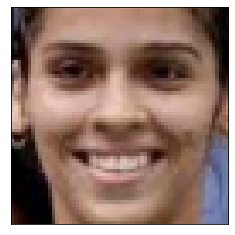

In [7]:
show(10)

  Child : Yes


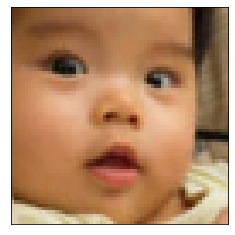

In [17]:
show(6000)

[0 1]
[5500 3500]


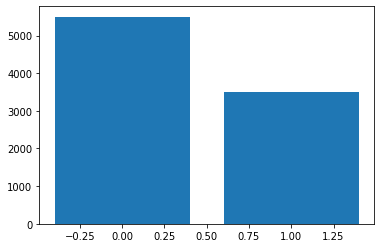

In [25]:
val,counts=np.unique(y,return_counts=1)
print(val)
print(counts)
plt.bar(val,counts)
plt.show()

In [18]:
images_f=np.array(images)
y=np.array(childs)
X = images_f/255

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10,stratify=y)

## Building model

In [28]:

C_model = models.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(2, activation='sigmoid')    

])
C_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
C_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 128)       

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
fle_s="Child_Detection.h5"
checkpoint=ModelCheckpoint(fle_s,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=50,monitor='val_accuracy',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [30]:
C_History = C_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150,callbacks=callback_list)

Epoch 1/150
211/211 [==============================] - ETA: 0s - loss: 0.1707 - accuracy: 0.9424
Epoch 1: val_accuracy improved from -inf to 0.93556, saving model to Child_Detection2.h5
211/211 [==============================] - 47s 224ms/step - loss: 0.1707 - accuracy: 0.9424 - val_loss: 0.1708 - val_accuracy: 0.9356
Epoch 2/150
211/211 [==============================] - ETA: 0s - loss: 0.1421 - accuracy: 0.9458
Epoch 2: val_accuracy did not improve from 0.93556
211/211 [==============================] - 47s 223ms/step - loss: 0.1421 - accuracy: 0.9458 - val_loss: 0.1897 - val_accuracy: 0.9320
Epoch 3/150
211/211 [==============================] - ETA: 0s - loss: 0.1271 - accuracy: 0.9567
Epoch 3: val_accuracy improved from 0.93556 to 0.95067, saving model to Child_Detection2.h5
211/211 [==============================] - 45s 215ms/step - loss: 0.1271 - accuracy: 0.9567 - val_loss: 0.1451 - val_accuracy: 0.9507
Epoch 4/150
211/211 [==============================] - ETA: 0s - loss: 0.11

Epoch 58/150
211/211 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9963
Epoch 58: val_accuracy did not improve from 0.96400
211/211 [==============================] - 45s 215ms/step - loss: 0.0150 - accuracy: 0.9963 - val_loss: 0.1974 - val_accuracy: 0.9533
Epoch 59/150
211/211 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9944
Epoch 59: val_accuracy did not improve from 0.96400
211/211 [==============================] - 45s 213ms/step - loss: 0.0196 - accuracy: 0.9944 - val_loss: 0.2018 - val_accuracy: 0.9484
Epoch 60/150
211/211 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9988
Epoch 60: val_accuracy did not improve from 0.96400
211/211 [==============================] - 45s 216ms/step - loss: 0.0030 - accuracy: 0.9988 - val_loss: 0.4010 - val_accuracy: 0.9582
Epoch 61/150
211/211 [==============================] - ETA: 0s - loss: 7.9800e-04 - accuracy: 0.9997
Epoch 61: val_accuracy did not improve from 0.

211/211 [==============================] - 46s 216ms/step - loss: 8.5331e-04 - accuracy: 0.9996 - val_loss: 0.4633 - val_accuracy: 0.9613
Epoch 87/150
211/211 [==============================] - ETA: 0s - loss: 6.6756e-04 - accuracy: 0.9997
Epoch 87: val_accuracy did not improve from 0.96400
211/211 [==============================] - 47s 223ms/step - loss: 6.6756e-04 - accuracy: 0.9997 - val_loss: 0.5781 - val_accuracy: 0.9618
Epoch 88/150
211/211 [==============================] - ETA: 0s - loss: 5.5286e-04 - accuracy: 0.9997
Epoch 88: val_accuracy did not improve from 0.96400
211/211 [==============================] - 46s 217ms/step - loss: 5.5286e-04 - accuracy: 0.9997 - val_loss: 0.5889 - val_accuracy: 0.9618
Epoch 89/150
211/211 [==============================] - ETA: 0s - loss: 5.2218e-04 - accuracy: 0.9997
Epoch 89: val_accuracy did not improve from 0.96400
211/211 [==============================] - 46s 216ms/step - loss: 5.2218e-04 - accuracy: 0.9997 - val_loss: 0.6054 - val_acc

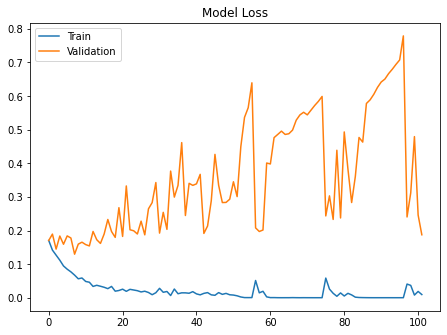

In [31]:
plt.plot(C_History.history['loss'])
plt.plot(C_History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel=("Epoch")
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

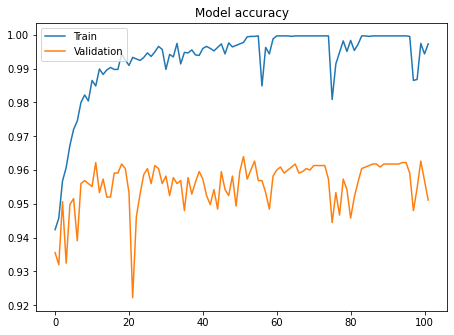

In [96]:
plt.plot(C_History.history['accuracy'])
plt.plot(C_History.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel=("Epoch")
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

## Testing Model

In [35]:
C_model.evaluate(X_test,y_test)

71/71 [==============================] - 4s 52ms/step - loss: 0.3012 - accuracy: 0.9640


[0.30115053057670593, 0.9639999866485596]

In [37]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = C_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

71/71 [==============================] - 4s 53ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1375
           1       0.97      0.94      0.95       875

    accuracy                           0.96      2250
   macro avg       0.96      0.96      0.96      2250
weighted avg       0.96      0.96      0.96      2250



In [38]:
def test_image(i):
    plt.imshow(X_test[i])
    plt.xticks([]),plt.yticks([])
    bd=['No',"Yes"]
    print("    Child : ",bd[y_pred_classes[i]])
    plt.show()
    

    Child :  No


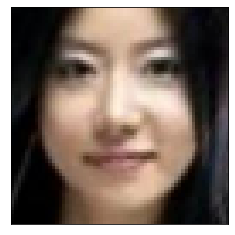

In [39]:
test_image(100)

    Child :  Yes


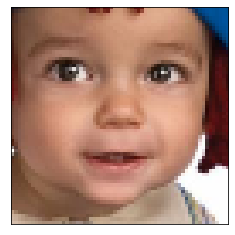

In [47]:
test_image(2)

# 2.Detecting whether person is 'Bald' or not 

In [66]:
# Loading data
B_fd="./Data/Bald"
B_files=os.listdir(B_fd)
balds=[]
images=[]

for f in B_files:
  
    bald=int(f.split('_')[0])
    total=B_fd+'/'+f
    print(total)
    image =cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(64,64))
    images.append(image)
    balds.append(bald)

./Data/Bald/0_NotBald (1).jpg
./Data/Bald/0_NotBald (10).jpg
./Data/Bald/0_NotBald (100).jpg
./Data/Bald/0_NotBald (1000).jpg
./Data/Bald/0_NotBald (1001).jpg
./Data/Bald/0_NotBald (1002).jpg
./Data/Bald/0_NotBald (1003).jpg
./Data/Bald/0_NotBald (1004).jpg
./Data/Bald/0_NotBald (1005).jpg
./Data/Bald/0_NotBald (1006).jpg
./Data/Bald/0_NotBald (1007).jpg
./Data/Bald/0_NotBald (1008).jpg
./Data/Bald/0_NotBald (1009).jpg
./Data/Bald/0_NotBald (101).jpg
./Data/Bald/0_NotBald (1010).jpg
./Data/Bald/0_NotBald (1011).jpg
./Data/Bald/0_NotBald (1012).jpg
./Data/Bald/0_NotBald (1013).jpg
./Data/Bald/0_NotBald (1014).jpg
./Data/Bald/0_NotBald (1015).jpg
./Data/Bald/0_NotBald (1016).jpg
./Data/Bald/0_NotBald (1017).jpg
./Data/Bald/0_NotBald (1018).jpg
./Data/Bald/0_NotBald (1019).jpg
./Data/Bald/0_NotBald (102).jpg
./Data/Bald/0_NotBald (1020).jpg
./Data/Bald/0_NotBald (1021).jpg
./Data/Bald/0_NotBald (1022).jpg
./Data/Bald/0_NotBald (1023).jpg
./Data/Bald/0_NotBald (1024).jpg
./Data/Bald/0_NotB

./Data/Bald/0_NotBald (131).jpg
./Data/Bald/0_NotBald (1310).jpg
./Data/Bald/0_NotBald (1311).jpg
./Data/Bald/0_NotBald (1312).jpg
./Data/Bald/0_NotBald (1313).jpg
./Data/Bald/0_NotBald (1314).jpg
./Data/Bald/0_NotBald (1315).jpg
./Data/Bald/0_NotBald (1316).jpg
./Data/Bald/0_NotBald (1317).jpg
./Data/Bald/0_NotBald (1318).jpg
./Data/Bald/0_NotBald (1319).jpg
./Data/Bald/0_NotBald (132).jpg
./Data/Bald/0_NotBald (1320).jpg
./Data/Bald/0_NotBald (1321).jpg
./Data/Bald/0_NotBald (1322).jpg
./Data/Bald/0_NotBald (1323).jpg
./Data/Bald/0_NotBald (1324).jpg
./Data/Bald/0_NotBald (1325).jpg
./Data/Bald/0_NotBald (1326).jpg
./Data/Bald/0_NotBald (1327).jpg
./Data/Bald/0_NotBald (1328).jpg
./Data/Bald/0_NotBald (1329).jpg
./Data/Bald/0_NotBald (133).jpg
./Data/Bald/0_NotBald (1330).jpg
./Data/Bald/0_NotBald (1331).jpg
./Data/Bald/0_NotBald (1332).jpg
./Data/Bald/0_NotBald (1333).jpg
./Data/Bald/0_NotBald (1334).jpg
./Data/Bald/0_NotBald (1335).jpg
./Data/Bald/0_NotBald (1336).jpg
./Data/Bald/0

./Data/Bald/0_NotBald (1632).jpg
./Data/Bald/0_NotBald (1633).jpg
./Data/Bald/0_NotBald (1634).jpg
./Data/Bald/0_NotBald (1635).jpg
./Data/Bald/0_NotBald (1636).jpg
./Data/Bald/0_NotBald (1637).jpg
./Data/Bald/0_NotBald (1638).jpg
./Data/Bald/0_NotBald (1639).jpg
./Data/Bald/0_NotBald (164).jpg
./Data/Bald/0_NotBald (1640).jpg
./Data/Bald/0_NotBald (1641).jpg
./Data/Bald/0_NotBald (1642).jpg
./Data/Bald/0_NotBald (1643).jpg
./Data/Bald/0_NotBald (1644).jpg
./Data/Bald/0_NotBald (1645).jpg
./Data/Bald/0_NotBald (1646).jpg
./Data/Bald/0_NotBald (1647).jpg
./Data/Bald/0_NotBald (1648).jpg
./Data/Bald/0_NotBald (1649).jpg
./Data/Bald/0_NotBald (165).jpg
./Data/Bald/0_NotBald (1650).jpg
./Data/Bald/0_NotBald (1651).jpg
./Data/Bald/0_NotBald (1652).jpg
./Data/Bald/0_NotBald (1653).jpg
./Data/Bald/0_NotBald (1654).jpg
./Data/Bald/0_NotBald (1655).jpg
./Data/Bald/0_NotBald (1656).jpg
./Data/Bald/0_NotBald (1657).jpg
./Data/Bald/0_NotBald (1658).jpg
./Data/Bald/0_NotBald (1659).jpg
./Data/Bald/

./Data/Bald/0_NotBald (198).jpg
./Data/Bald/0_NotBald (1980).jpg
./Data/Bald/0_NotBald (1981).jpg
./Data/Bald/0_NotBald (1982).jpg
./Data/Bald/0_NotBald (1983).jpg
./Data/Bald/0_NotBald (1984).jpg
./Data/Bald/0_NotBald (1985).jpg
./Data/Bald/0_NotBald (1986).jpg
./Data/Bald/0_NotBald (1987).jpg
./Data/Bald/0_NotBald (1988).jpg
./Data/Bald/0_NotBald (1989).jpg
./Data/Bald/0_NotBald (199).jpg
./Data/Bald/0_NotBald (1990).jpg
./Data/Bald/0_NotBald (1991).jpg
./Data/Bald/0_NotBald (1992).jpg
./Data/Bald/0_NotBald (1993).jpg
./Data/Bald/0_NotBald (1994).jpg
./Data/Bald/0_NotBald (1995).jpg
./Data/Bald/0_NotBald (1996).jpg
./Data/Bald/0_NotBald (1997).jpg
./Data/Bald/0_NotBald (1998).jpg
./Data/Bald/0_NotBald (1999).jpg
./Data/Bald/0_NotBald (2).jpg
./Data/Bald/0_NotBald (20).jpg
./Data/Bald/0_NotBald (200).jpg
./Data/Bald/0_NotBald (2000).jpg
./Data/Bald/0_NotBald (2001).jpg
./Data/Bald/0_NotBald (2002).jpg
./Data/Bald/0_NotBald (2003).jpg
./Data/Bald/0_NotBald (2004).jpg
./Data/Bald/0_NotB

./Data/Bald/0_NotBald (2360).jpg
./Data/Bald/0_NotBald (2361).jpg
./Data/Bald/0_NotBald (2362).jpg
./Data/Bald/0_NotBald (2363).jpg
./Data/Bald/0_NotBald (2364).jpg
./Data/Bald/0_NotBald (2365).jpg
./Data/Bald/0_NotBald (2366).jpg
./Data/Bald/0_NotBald (2367).jpg
./Data/Bald/0_NotBald (2368).jpg
./Data/Bald/0_NotBald (2369).jpg
./Data/Bald/0_NotBald (237).jpg
./Data/Bald/0_NotBald (2370).jpg
./Data/Bald/0_NotBald (2371).jpg
./Data/Bald/0_NotBald (2372).jpg
./Data/Bald/0_NotBald (2373).jpg
./Data/Bald/0_NotBald (2374).jpg
./Data/Bald/0_NotBald (2375).jpg
./Data/Bald/0_NotBald (2376).jpg
./Data/Bald/0_NotBald (2377).jpg
./Data/Bald/0_NotBald (2378).jpg
./Data/Bald/0_NotBald (2379).jpg
./Data/Bald/0_NotBald (238).jpg
./Data/Bald/0_NotBald (2380).jpg
./Data/Bald/0_NotBald (2381).jpg
./Data/Bald/0_NotBald (2382).jpg
./Data/Bald/0_NotBald (2383).jpg
./Data/Bald/0_NotBald (2384).jpg
./Data/Bald/0_NotBald (2385).jpg
./Data/Bald/0_NotBald (2386).jpg
./Data/Bald/0_NotBald (2387).jpg
./Data/Bald/

./Data/Bald/0_NotBald (2659).jpg
./Data/Bald/0_NotBald (266).jpg
./Data/Bald/0_NotBald (2660).jpg
./Data/Bald/0_NotBald (2661).jpg
./Data/Bald/0_NotBald (2662).jpg
./Data/Bald/0_NotBald (2663).jpg
./Data/Bald/0_NotBald (2664).jpg
./Data/Bald/0_NotBald (2665).jpg
./Data/Bald/0_NotBald (2666).jpg
./Data/Bald/0_NotBald (2667).jpg
./Data/Bald/0_NotBald (2668).jpg
./Data/Bald/0_NotBald (2669).jpg
./Data/Bald/0_NotBald (267).jpg
./Data/Bald/0_NotBald (2670).jpg
./Data/Bald/0_NotBald (2671).jpg
./Data/Bald/0_NotBald (2672).jpg
./Data/Bald/0_NotBald (2673).jpg
./Data/Bald/0_NotBald (2674).jpg
./Data/Bald/0_NotBald (2675).jpg
./Data/Bald/0_NotBald (2676).jpg
./Data/Bald/0_NotBald (2677).jpg
./Data/Bald/0_NotBald (2678).jpg
./Data/Bald/0_NotBald (2679).jpg
./Data/Bald/0_NotBald (268).jpg
./Data/Bald/0_NotBald (2680).jpg
./Data/Bald/0_NotBald (2681).jpg
./Data/Bald/0_NotBald (2682).jpg
./Data/Bald/0_NotBald (2683).jpg
./Data/Bald/0_NotBald (2684).jpg
./Data/Bald/0_NotBald (2685).jpg
./Data/Bald/0

./Data/Bald/0_NotBald (2920).jpg
./Data/Bald/0_NotBald (2921).jpg
./Data/Bald/0_NotBald (2922).jpg
./Data/Bald/0_NotBald (2923).jpg
./Data/Bald/0_NotBald (2924).jpg
./Data/Bald/0_NotBald (2925).jpg
./Data/Bald/0_NotBald (2926).jpg
./Data/Bald/0_NotBald (2927).jpg
./Data/Bald/0_NotBald (2928).jpg
./Data/Bald/0_NotBald (2929).jpg
./Data/Bald/0_NotBald (293).jpg
./Data/Bald/0_NotBald (2930).jpg
./Data/Bald/0_NotBald (2931).jpg
./Data/Bald/0_NotBald (2932).jpg
./Data/Bald/0_NotBald (2933).jpg
./Data/Bald/0_NotBald (2934).jpg
./Data/Bald/0_NotBald (2935).jpg
./Data/Bald/0_NotBald (2936).jpg
./Data/Bald/0_NotBald (2937).jpg
./Data/Bald/0_NotBald (2938).jpg
./Data/Bald/0_NotBald (2939).jpg
./Data/Bald/0_NotBald (294).jpg
./Data/Bald/0_NotBald (2940).jpg
./Data/Bald/0_NotBald (2941).jpg
./Data/Bald/0_NotBald (2942).jpg
./Data/Bald/0_NotBald (2943).jpg
./Data/Bald/0_NotBald (2944).jpg
./Data/Bald/0_NotBald (2945).jpg
./Data/Bald/0_NotBald (2946).jpg
./Data/Bald/0_NotBald (2947).jpg
./Data/Bald/

./Data/Bald/0_NotBald (335).jpg
./Data/Bald/0_NotBald (3350).jpg
./Data/Bald/0_NotBald (3351).jpg
./Data/Bald/0_NotBald (3352).jpg
./Data/Bald/0_NotBald (3353).jpg
./Data/Bald/0_NotBald (3354).jpg
./Data/Bald/0_NotBald (3355).jpg
./Data/Bald/0_NotBald (3356).jpg
./Data/Bald/0_NotBald (3357).jpg
./Data/Bald/0_NotBald (3358).jpg
./Data/Bald/0_NotBald (3359).jpg
./Data/Bald/0_NotBald (336).jpg
./Data/Bald/0_NotBald (3360).jpg
./Data/Bald/0_NotBald (3361).jpg
./Data/Bald/0_NotBald (3362).jpg
./Data/Bald/0_NotBald (3363).jpg
./Data/Bald/0_NotBald (3364).jpg
./Data/Bald/0_NotBald (3365).jpg
./Data/Bald/0_NotBald (3366).jpg
./Data/Bald/0_NotBald (3367).jpg
./Data/Bald/0_NotBald (3368).jpg
./Data/Bald/0_NotBald (3369).jpg
./Data/Bald/0_NotBald (337).jpg
./Data/Bald/0_NotBald (3370).jpg
./Data/Bald/0_NotBald (3371).jpg
./Data/Bald/0_NotBald (3372).jpg
./Data/Bald/0_NotBald (3373).jpg
./Data/Bald/0_NotBald (3374).jpg
./Data/Bald/0_NotBald (3375).jpg
./Data/Bald/0_NotBald (3376).jpg
./Data/Bald/0

./Data/Bald/0_NotBald (3636).jpg
./Data/Bald/0_NotBald (3637).jpg
./Data/Bald/0_NotBald (3638).jpg
./Data/Bald/0_NotBald (3639).jpg
./Data/Bald/0_NotBald (364).jpg
./Data/Bald/0_NotBald (3640).jpg
./Data/Bald/0_NotBald (3641).jpg
./Data/Bald/0_NotBald (3642).jpg
./Data/Bald/0_NotBald (3643).jpg
./Data/Bald/0_NotBald (3644).jpg
./Data/Bald/0_NotBald (3645).jpg
./Data/Bald/0_NotBald (3646).jpg
./Data/Bald/0_NotBald (3647).jpg
./Data/Bald/0_NotBald (3648).jpg
./Data/Bald/0_NotBald (3649).jpg
./Data/Bald/0_NotBald (365).jpg
./Data/Bald/0_NotBald (3650).jpg
./Data/Bald/0_NotBald (3651).jpg
./Data/Bald/0_NotBald (3652).jpg
./Data/Bald/0_NotBald (3653).jpg
./Data/Bald/0_NotBald (3654).jpg
./Data/Bald/0_NotBald (3655).jpg
./Data/Bald/0_NotBald (3656).jpg
./Data/Bald/0_NotBald (3657).jpg
./Data/Bald/0_NotBald (3658).jpg
./Data/Bald/0_NotBald (3659).jpg
./Data/Bald/0_NotBald (366).jpg
./Data/Bald/0_NotBald (3660).jpg
./Data/Bald/0_NotBald (3661).jpg
./Data/Bald/0_NotBald (3662).jpg
./Data/Bald/0

./Data/Bald/0_NotBald (3997).jpg
./Data/Bald/0_NotBald (3998).jpg
./Data/Bald/0_NotBald (3999).jpg
./Data/Bald/0_NotBald (4).jpg
./Data/Bald/0_NotBald (40).jpg
./Data/Bald/0_NotBald (400).jpg
./Data/Bald/0_NotBald (4000).jpg
./Data/Bald/0_NotBald (4001).jpg
./Data/Bald/0_NotBald (4002).jpg
./Data/Bald/0_NotBald (4003).jpg
./Data/Bald/0_NotBald (4004).jpg
./Data/Bald/0_NotBald (4005).jpg
./Data/Bald/0_NotBald (4006).jpg
./Data/Bald/0_NotBald (4007).jpg
./Data/Bald/0_NotBald (4008).jpg
./Data/Bald/0_NotBald (4009).jpg
./Data/Bald/0_NotBald (401).jpg
./Data/Bald/0_NotBald (4010).jpg
./Data/Bald/0_NotBald (4011).jpg
./Data/Bald/0_NotBald (4012).jpg
./Data/Bald/0_NotBald (4013).jpg
./Data/Bald/0_NotBald (4014).jpg
./Data/Bald/0_NotBald (4015).jpg
./Data/Bald/0_NotBald (4016).jpg
./Data/Bald/0_NotBald (4017).jpg
./Data/Bald/0_NotBald (4018).jpg
./Data/Bald/0_NotBald (4019).jpg
./Data/Bald/0_NotBald (402).jpg
./Data/Bald/0_NotBald (4020).jpg
./Data/Bald/0_NotBald (4021).jpg
./Data/Bald/0_NotB

./Data/Bald/0_NotBald (4367).jpg
./Data/Bald/0_NotBald (4368).jpg
./Data/Bald/0_NotBald (4369).jpg
./Data/Bald/0_NotBald (437).jpg
./Data/Bald/0_NotBald (4370).jpg
./Data/Bald/0_NotBald (4371).jpg
./Data/Bald/0_NotBald (4372).jpg
./Data/Bald/0_NotBald (4373).jpg
./Data/Bald/0_NotBald (4374).jpg
./Data/Bald/0_NotBald (4375).jpg
./Data/Bald/0_NotBald (4376).jpg
./Data/Bald/0_NotBald (4377).jpg
./Data/Bald/0_NotBald (4378).jpg
./Data/Bald/0_NotBald (4379).jpg
./Data/Bald/0_NotBald (438).jpg
./Data/Bald/0_NotBald (4380).jpg
./Data/Bald/0_NotBald (4381).jpg
./Data/Bald/0_NotBald (4382).jpg
./Data/Bald/0_NotBald (4383).jpg
./Data/Bald/0_NotBald (4384).jpg
./Data/Bald/0_NotBald (4385).jpg
./Data/Bald/0_NotBald (4386).jpg
./Data/Bald/0_NotBald (4387).jpg
./Data/Bald/0_NotBald (4388).jpg
./Data/Bald/0_NotBald (4389).jpg
./Data/Bald/0_NotBald (439).jpg
./Data/Bald/0_NotBald (4390).jpg
./Data/Bald/0_NotBald (4391).jpg
./Data/Bald/0_NotBald (4392).jpg
./Data/Bald/0_NotBald (4393).jpg
./Data/Bald/0

./Data/Bald/0_NotBald (4700).jpg
./Data/Bald/0_NotBald (4701).jpg
./Data/Bald/0_NotBald (4702).jpg
./Data/Bald/0_NotBald (4703).jpg
./Data/Bald/0_NotBald (4704).jpg
./Data/Bald/0_NotBald (4705).jpg
./Data/Bald/0_NotBald (4706).jpg
./Data/Bald/0_NotBald (4707).jpg
./Data/Bald/0_NotBald (4708).jpg
./Data/Bald/0_NotBald (4709).jpg
./Data/Bald/0_NotBald (471).jpg
./Data/Bald/0_NotBald (4710).jpg
./Data/Bald/0_NotBald (4711).jpg
./Data/Bald/0_NotBald (4712).jpg
./Data/Bald/0_NotBald (4713).jpg
./Data/Bald/0_NotBald (4714).jpg
./Data/Bald/0_NotBald (4715).jpg
./Data/Bald/0_NotBald (4716).jpg
./Data/Bald/0_NotBald (4717).jpg
./Data/Bald/0_NotBald (4718).jpg
./Data/Bald/0_NotBald (4719).jpg
./Data/Bald/0_NotBald (472).jpg
./Data/Bald/0_NotBald (4720).jpg
./Data/Bald/0_NotBald (4721).jpg
./Data/Bald/0_NotBald (4722).jpg
./Data/Bald/0_NotBald (4723).jpg
./Data/Bald/0_NotBald (4724).jpg
./Data/Bald/0_NotBald (4725).jpg
./Data/Bald/0_NotBald (4726).jpg
./Data/Bald/0_NotBald (4727).jpg
./Data/Bald/

./Data/Bald/0_NotBald (4943).jpg
./Data/Bald/0_NotBald (4944).jpg
./Data/Bald/0_NotBald (4945).jpg
./Data/Bald/0_NotBald (4946).jpg
./Data/Bald/0_NotBald (4947).jpg
./Data/Bald/0_NotBald (4948).jpg
./Data/Bald/0_NotBald (4949).jpg
./Data/Bald/0_NotBald (495).jpg
./Data/Bald/0_NotBald (4950).jpg
./Data/Bald/0_NotBald (4951).jpg
./Data/Bald/0_NotBald (4952).jpg
./Data/Bald/0_NotBald (4953).jpg
./Data/Bald/0_NotBald (4954).jpg
./Data/Bald/0_NotBald (4955).jpg
./Data/Bald/0_NotBald (4956).jpg
./Data/Bald/0_NotBald (4957).jpg
./Data/Bald/0_NotBald (4958).jpg
./Data/Bald/0_NotBald (4959).jpg
./Data/Bald/0_NotBald (496).jpg
./Data/Bald/0_NotBald (4960).jpg
./Data/Bald/0_NotBald (4961).jpg
./Data/Bald/0_NotBald (4962).jpg
./Data/Bald/0_NotBald (4963).jpg
./Data/Bald/0_NotBald (4964).jpg
./Data/Bald/0_NotBald (4965).jpg
./Data/Bald/0_NotBald (4966).jpg
./Data/Bald/0_NotBald (4967).jpg
./Data/Bald/0_NotBald (4968).jpg
./Data/Bald/0_NotBald (4969).jpg
./Data/Bald/0_NotBald (497).jpg
./Data/Bald/0

./Data/Bald/0_NotBald (682).jpg
./Data/Bald/0_NotBald (683).jpg
./Data/Bald/0_NotBald (684).jpg
./Data/Bald/0_NotBald (685).jpg
./Data/Bald/0_NotBald (686).jpg
./Data/Bald/0_NotBald (687).jpg
./Data/Bald/0_NotBald (688).jpg
./Data/Bald/0_NotBald (689).jpg
./Data/Bald/0_NotBald (69).jpg
./Data/Bald/0_NotBald (690).jpg
./Data/Bald/0_NotBald (691).jpg
./Data/Bald/0_NotBald (692).jpg
./Data/Bald/0_NotBald (693).jpg
./Data/Bald/0_NotBald (694).jpg
./Data/Bald/0_NotBald (695).jpg
./Data/Bald/0_NotBald (696).jpg
./Data/Bald/0_NotBald (697).jpg
./Data/Bald/0_NotBald (698).jpg
./Data/Bald/0_NotBald (699).jpg
./Data/Bald/0_NotBald (7).jpg
./Data/Bald/0_NotBald (70).jpg
./Data/Bald/0_NotBald (700).jpg
./Data/Bald/0_NotBald (701).jpg
./Data/Bald/0_NotBald (702).jpg
./Data/Bald/0_NotBald (703).jpg
./Data/Bald/0_NotBald (704).jpg
./Data/Bald/0_NotBald (705).jpg
./Data/Bald/0_NotBald (706).jpg
./Data/Bald/0_NotBald (707).jpg
./Data/Bald/0_NotBald (708).jpg
./Data/Bald/0_NotBald (709).jpg
./Data/Bald/

./Data/Bald/1_Bald (1045).jpg
./Data/Bald/1_Bald (1046).jpg
./Data/Bald/1_Bald (1047).jpg
./Data/Bald/1_Bald (1048).jpg
./Data/Bald/1_Bald (1049).jpg
./Data/Bald/1_Bald (105).jpg
./Data/Bald/1_Bald (1050).jpg
./Data/Bald/1_Bald (1051).jpg
./Data/Bald/1_Bald (1052).jpg
./Data/Bald/1_Bald (1053).jpg
./Data/Bald/1_Bald (1054).jpg
./Data/Bald/1_Bald (1055).jpg
./Data/Bald/1_Bald (1056).jpg
./Data/Bald/1_Bald (1057).jpg
./Data/Bald/1_Bald (1058).jpg
./Data/Bald/1_Bald (1059).jpg
./Data/Bald/1_Bald (106).jpg
./Data/Bald/1_Bald (1060).jpg
./Data/Bald/1_Bald (1061).jpg
./Data/Bald/1_Bald (1062).jpg
./Data/Bald/1_Bald (1063).jpg
./Data/Bald/1_Bald (1064).jpg
./Data/Bald/1_Bald (1065).jpg
./Data/Bald/1_Bald (1066).jpg
./Data/Bald/1_Bald (1067).jpg
./Data/Bald/1_Bald (1068).jpg
./Data/Bald/1_Bald (1069).jpg
./Data/Bald/1_Bald (107).jpg
./Data/Bald/1_Bald (1070).jpg
./Data/Bald/1_Bald (1071).jpg
./Data/Bald/1_Bald (1072).jpg
./Data/Bald/1_Bald (1073).jpg
./Data/Bald/1_Bald (1074).jpg
./Data/Bald/1

./Data/Bald/1_Bald (1304).jpg
./Data/Bald/1_Bald (1305).jpg
./Data/Bald/1_Bald (1306).jpg
./Data/Bald/1_Bald (1307).jpg
./Data/Bald/1_Bald (1308).jpg
./Data/Bald/1_Bald (1309).jpg
./Data/Bald/1_Bald (131).jpg
./Data/Bald/1_Bald (1310).jpg
./Data/Bald/1_Bald (1311).jpg
./Data/Bald/1_Bald (1312).jpg
./Data/Bald/1_Bald (1313).jpg
./Data/Bald/1_Bald (1314).jpg
./Data/Bald/1_Bald (1315).jpg
./Data/Bald/1_Bald (1316).jpg
./Data/Bald/1_Bald (1317).jpg
./Data/Bald/1_Bald (1318).jpg
./Data/Bald/1_Bald (1319).jpg
./Data/Bald/1_Bald (132).jpg
./Data/Bald/1_Bald (1320).jpg
./Data/Bald/1_Bald (1321).jpg
./Data/Bald/1_Bald (1322).jpg
./Data/Bald/1_Bald (1323).jpg
./Data/Bald/1_Bald (1324).jpg
./Data/Bald/1_Bald (1325).jpg
./Data/Bald/1_Bald (1326).jpg
./Data/Bald/1_Bald (1327).jpg
./Data/Bald/1_Bald (1328).jpg
./Data/Bald/1_Bald (1329).jpg
./Data/Bald/1_Bald (133).jpg
./Data/Bald/1_Bald (1330).jpg
./Data/Bald/1_Bald (1331).jpg
./Data/Bald/1_Bald (1332).jpg
./Data/Bald/1_Bald (1333).jpg
./Data/Bald/1

./Data/Bald/1_Bald (1561).jpg
./Data/Bald/1_Bald (1562).jpg
./Data/Bald/1_Bald (1563).jpg
./Data/Bald/1_Bald (1564).jpg
./Data/Bald/1_Bald (1565).jpg
./Data/Bald/1_Bald (1566).jpg
./Data/Bald/1_Bald (1567).jpg
./Data/Bald/1_Bald (1568).jpg
./Data/Bald/1_Bald (1569).jpg
./Data/Bald/1_Bald (157).jpg
./Data/Bald/1_Bald (1570).jpg
./Data/Bald/1_Bald (1571).jpg
./Data/Bald/1_Bald (1572).jpg
./Data/Bald/1_Bald (1573).jpg
./Data/Bald/1_Bald (1574).jpg
./Data/Bald/1_Bald (1575).jpg
./Data/Bald/1_Bald (1576).jpg
./Data/Bald/1_Bald (1577).jpg
./Data/Bald/1_Bald (1578).jpg
./Data/Bald/1_Bald (1579).jpg
./Data/Bald/1_Bald (158).jpg
./Data/Bald/1_Bald (1580).jpg
./Data/Bald/1_Bald (1581).jpg
./Data/Bald/1_Bald (1582).jpg
./Data/Bald/1_Bald (1583).jpg
./Data/Bald/1_Bald (1584).jpg
./Data/Bald/1_Bald (1585).jpg
./Data/Bald/1_Bald (1586).jpg
./Data/Bald/1_Bald (1587).jpg
./Data/Bald/1_Bald (1588).jpg
./Data/Bald/1_Bald (1589).jpg
./Data/Bald/1_Bald (159).jpg
./Data/Bald/1_Bald (1590).jpg
./Data/Bald/1

./Data/Bald/1_Bald (19).jpg
./Data/Bald/1_Bald (190).jpg
./Data/Bald/1_Bald (1900).jpg
./Data/Bald/1_Bald (1901).jpg
./Data/Bald/1_Bald (1902).jpg
./Data/Bald/1_Bald (1903).jpg
./Data/Bald/1_Bald (1904).jpg
./Data/Bald/1_Bald (1905).jpg
./Data/Bald/1_Bald (1906).jpg
./Data/Bald/1_Bald (1907).jpg
./Data/Bald/1_Bald (1908).jpg
./Data/Bald/1_Bald (1909).jpg
./Data/Bald/1_Bald (191).jpg
./Data/Bald/1_Bald (1910).jpg
./Data/Bald/1_Bald (1911).jpg
./Data/Bald/1_Bald (1912).jpg
./Data/Bald/1_Bald (1913).jpg
./Data/Bald/1_Bald (1914).jpg
./Data/Bald/1_Bald (1915).jpg
./Data/Bald/1_Bald (1916).jpg
./Data/Bald/1_Bald (1917).jpg
./Data/Bald/1_Bald (1918).jpg
./Data/Bald/1_Bald (1919).jpg
./Data/Bald/1_Bald (192).jpg
./Data/Bald/1_Bald (1920).jpg
./Data/Bald/1_Bald (1921).jpg
./Data/Bald/1_Bald (1922).jpg
./Data/Bald/1_Bald (1923).jpg
./Data/Bald/1_Bald (1924).jpg
./Data/Bald/1_Bald (1925).jpg
./Data/Bald/1_Bald (1926).jpg
./Data/Bald/1_Bald (1927).jpg
./Data/Bald/1_Bald (1928).jpg
./Data/Bald/1_B

./Data/Bald/1_Bald (2275).jpg
./Data/Bald/1_Bald (2276).jpg
./Data/Bald/1_Bald (2277).jpg
./Data/Bald/1_Bald (2278).jpg
./Data/Bald/1_Bald (2279).jpg
./Data/Bald/1_Bald (228).jpg
./Data/Bald/1_Bald (2280).jpg
./Data/Bald/1_Bald (2281).jpg
./Data/Bald/1_Bald (2282).jpg
./Data/Bald/1_Bald (2283).jpg
./Data/Bald/1_Bald (2284).jpg
./Data/Bald/1_Bald (2285).jpg
./Data/Bald/1_Bald (2286).jpg
./Data/Bald/1_Bald (2287).jpg
./Data/Bald/1_Bald (2288).jpg
./Data/Bald/1_Bald (2289).jpg
./Data/Bald/1_Bald (229).jpg
./Data/Bald/1_Bald (2290).jpg
./Data/Bald/1_Bald (2291).jpg
./Data/Bald/1_Bald (2292).jpg
./Data/Bald/1_Bald (2293).jpg
./Data/Bald/1_Bald (2294).jpg
./Data/Bald/1_Bald (2295).jpg
./Data/Bald/1_Bald (2296).jpg
./Data/Bald/1_Bald (2297).jpg
./Data/Bald/1_Bald (2298).jpg
./Data/Bald/1_Bald (2299).jpg
./Data/Bald/1_Bald (23).jpg
./Data/Bald/1_Bald (230).jpg
./Data/Bald/1_Bald (2300).jpg
./Data/Bald/1_Bald (2301).jpg
./Data/Bald/1_Bald (2302).jpg
./Data/Bald/1_Bald (2303).jpg
./Data/Bald/1_B

./Data/Bald/1_Bald (2602).jpg
./Data/Bald/1_Bald (2603).jpg
./Data/Bald/1_Bald (2604).jpg
./Data/Bald/1_Bald (2605).jpg
./Data/Bald/1_Bald (2606).jpg
./Data/Bald/1_Bald (2607).jpg
./Data/Bald/1_Bald (2608).jpg
./Data/Bald/1_Bald (2609).jpg
./Data/Bald/1_Bald (261).jpg
./Data/Bald/1_Bald (2610).jpg
./Data/Bald/1_Bald (2611).jpg
./Data/Bald/1_Bald (2612).jpg
./Data/Bald/1_Bald (2613).jpg
./Data/Bald/1_Bald (2614).jpg
./Data/Bald/1_Bald (2615).jpg
./Data/Bald/1_Bald (2616).jpg
./Data/Bald/1_Bald (2617).jpg
./Data/Bald/1_Bald (2618).jpg
./Data/Bald/1_Bald (2619).jpg
./Data/Bald/1_Bald (262).jpg
./Data/Bald/1_Bald (2620).jpg
./Data/Bald/1_Bald (2621).jpg
./Data/Bald/1_Bald (2622).jpg
./Data/Bald/1_Bald (2623).jpg
./Data/Bald/1_Bald (2624).jpg
./Data/Bald/1_Bald (2625).jpg
./Data/Bald/1_Bald (2626).jpg
./Data/Bald/1_Bald (2627).jpg
./Data/Bald/1_Bald (2628).jpg
./Data/Bald/1_Bald (2629).jpg
./Data/Bald/1_Bald (263).jpg
./Data/Bald/1_Bald (2630).jpg
./Data/Bald/1_Bald (2631).jpg
./Data/Bald/1

./Data/Bald/1_Bald (2904).jpg
./Data/Bald/1_Bald (2905).jpg
./Data/Bald/1_Bald (2906).jpg
./Data/Bald/1_Bald (2907).jpg
./Data/Bald/1_Bald (2908).jpg
./Data/Bald/1_Bald (2909).jpg
./Data/Bald/1_Bald (291).jpg
./Data/Bald/1_Bald (2910).jpg
./Data/Bald/1_Bald (2911).jpg
./Data/Bald/1_Bald (2912).jpg
./Data/Bald/1_Bald (2913).jpg
./Data/Bald/1_Bald (2914).jpg
./Data/Bald/1_Bald (2915).jpg
./Data/Bald/1_Bald (2916).jpg
./Data/Bald/1_Bald (2917).jpg
./Data/Bald/1_Bald (2918).jpg
./Data/Bald/1_Bald (2919).jpg
./Data/Bald/1_Bald (292).jpg
./Data/Bald/1_Bald (2920).jpg
./Data/Bald/1_Bald (2921).jpg
./Data/Bald/1_Bald (2922).jpg
./Data/Bald/1_Bald (2923).jpg
./Data/Bald/1_Bald (2924).jpg
./Data/Bald/1_Bald (2925).jpg
./Data/Bald/1_Bald (2926).jpg
./Data/Bald/1_Bald (2927).jpg
./Data/Bald/1_Bald (2928).jpg
./Data/Bald/1_Bald (2929).jpg
./Data/Bald/1_Bald (293).jpg
./Data/Bald/1_Bald (2930).jpg
./Data/Bald/1_Bald (2931).jpg
./Data/Bald/1_Bald (2932).jpg
./Data/Bald/1_Bald (2933).jpg
./Data/Bald/1

./Data/Bald/1_Bald (3255).jpg
./Data/Bald/1_Bald (3256).jpg
./Data/Bald/1_Bald (3257).jpg
./Data/Bald/1_Bald (3258).jpg
./Data/Bald/1_Bald (3259).jpg
./Data/Bald/1_Bald (326).jpg
./Data/Bald/1_Bald (3260).jpg
./Data/Bald/1_Bald (3261).jpg
./Data/Bald/1_Bald (3262).jpg
./Data/Bald/1_Bald (3263).jpg
./Data/Bald/1_Bald (3264).jpg
./Data/Bald/1_Bald (3265).jpg
./Data/Bald/1_Bald (3266).jpg
./Data/Bald/1_Bald (3267).jpg
./Data/Bald/1_Bald (3268).jpg
./Data/Bald/1_Bald (3269).jpg
./Data/Bald/1_Bald (327).jpg
./Data/Bald/1_Bald (3270).jpg
./Data/Bald/1_Bald (3271).jpg
./Data/Bald/1_Bald (3272).jpg
./Data/Bald/1_Bald (3273).jpg
./Data/Bald/1_Bald (3274).jpg
./Data/Bald/1_Bald (3275).jpg
./Data/Bald/1_Bald (3276).jpg
./Data/Bald/1_Bald (3277).jpg
./Data/Bald/1_Bald (3278).jpg
./Data/Bald/1_Bald (3279).jpg
./Data/Bald/1_Bald (328).jpg
./Data/Bald/1_Bald (3280).jpg
./Data/Bald/1_Bald (3281).jpg
./Data/Bald/1_Bald (3282).jpg
./Data/Bald/1_Bald (3283).jpg
./Data/Bald/1_Bald (3284).jpg
./Data/Bald/1

./Data/Bald/1_Bald (3608).jpg
./Data/Bald/1_Bald (3609).jpg
./Data/Bald/1_Bald (361).jpg
./Data/Bald/1_Bald (3610).jpg
./Data/Bald/1_Bald (3611).jpg
./Data/Bald/1_Bald (3612).jpg
./Data/Bald/1_Bald (3613).jpg
./Data/Bald/1_Bald (3614).jpg
./Data/Bald/1_Bald (3615).jpg
./Data/Bald/1_Bald (3616).jpg
./Data/Bald/1_Bald (3617).jpg
./Data/Bald/1_Bald (3618).jpg
./Data/Bald/1_Bald (3619).jpg
./Data/Bald/1_Bald (362).jpg
./Data/Bald/1_Bald (3620).jpg
./Data/Bald/1_Bald (3621).jpg
./Data/Bald/1_Bald (3622).jpg
./Data/Bald/1_Bald (3623).jpg
./Data/Bald/1_Bald (3624).jpg
./Data/Bald/1_Bald (3625).jpg
./Data/Bald/1_Bald (3626).jpg
./Data/Bald/1_Bald (3627).jpg
./Data/Bald/1_Bald (3628).jpg
./Data/Bald/1_Bald (3629).jpg
./Data/Bald/1_Bald (363).jpg
./Data/Bald/1_Bald (3630).jpg
./Data/Bald/1_Bald (3631).jpg
./Data/Bald/1_Bald (3632).jpg
./Data/Bald/1_Bald (3633).jpg
./Data/Bald/1_Bald (3634).jpg
./Data/Bald/1_Bald (3635).jpg
./Data/Bald/1_Bald (3636).jpg
./Data/Bald/1_Bald (3637).jpg
./Data/Bald/1

./Data/Bald/1_Bald (3873).jpg
./Data/Bald/1_Bald (3874).jpg
./Data/Bald/1_Bald (3875).jpg
./Data/Bald/1_Bald (3876).jpg
./Data/Bald/1_Bald (3877).jpg
./Data/Bald/1_Bald (3878).jpg
./Data/Bald/1_Bald (3879).jpg
./Data/Bald/1_Bald (388).jpg
./Data/Bald/1_Bald (3880).jpg
./Data/Bald/1_Bald (3881).jpg
./Data/Bald/1_Bald (3882).jpg
./Data/Bald/1_Bald (3883).jpg
./Data/Bald/1_Bald (3884).jpg
./Data/Bald/1_Bald (3885).jpg
./Data/Bald/1_Bald (3886).jpg
./Data/Bald/1_Bald (3887).jpg
./Data/Bald/1_Bald (3888).jpg
./Data/Bald/1_Bald (3889).jpg
./Data/Bald/1_Bald (389).jpg
./Data/Bald/1_Bald (3890).jpg
./Data/Bald/1_Bald (3891).jpg
./Data/Bald/1_Bald (3892).jpg
./Data/Bald/1_Bald (3893).jpg
./Data/Bald/1_Bald (3894).jpg
./Data/Bald/1_Bald (3895).jpg
./Data/Bald/1_Bald (3896).jpg
./Data/Bald/1_Bald (3897).jpg
./Data/Bald/1_Bald (3898).jpg
./Data/Bald/1_Bald (3899).jpg
./Data/Bald/1_Bald (39).jpg
./Data/Bald/1_Bald (390).jpg
./Data/Bald/1_Bald (3900).jpg
./Data/Bald/1_Bald (3901).jpg
./Data/Bald/1_B

./Data/Bald/1_Bald (4131).jpg
./Data/Bald/1_Bald (4132).jpg
./Data/Bald/1_Bald (4133).jpg
./Data/Bald/1_Bald (4134).jpg
./Data/Bald/1_Bald (4135).jpg
./Data/Bald/1_Bald (4136).jpg
./Data/Bald/1_Bald (4137).jpg
./Data/Bald/1_Bald (4138).jpg
./Data/Bald/1_Bald (4139).jpg
./Data/Bald/1_Bald (414).jpg
./Data/Bald/1_Bald (4140).jpg
./Data/Bald/1_Bald (4141).jpg
./Data/Bald/1_Bald (4142).jpg
./Data/Bald/1_Bald (4143).jpg
./Data/Bald/1_Bald (4144).jpg
./Data/Bald/1_Bald (4145).jpg
./Data/Bald/1_Bald (4146).jpg
./Data/Bald/1_Bald (4147).jpg
./Data/Bald/1_Bald (4148).jpg
./Data/Bald/1_Bald (4149).jpg
./Data/Bald/1_Bald (415).jpg
./Data/Bald/1_Bald (4150).jpg
./Data/Bald/1_Bald (4151).jpg
./Data/Bald/1_Bald (4152).jpg
./Data/Bald/1_Bald (4153).jpg
./Data/Bald/1_Bald (4154).jpg
./Data/Bald/1_Bald (4155).jpg
./Data/Bald/1_Bald (4156).jpg
./Data/Bald/1_Bald (4157).jpg
./Data/Bald/1_Bald (4158).jpg
./Data/Bald/1_Bald (4159).jpg
./Data/Bald/1_Bald (416).jpg
./Data/Bald/1_Bald (4160).jpg
./Data/Bald/1

./Data/Bald/1_Bald (4395).jpg
./Data/Bald/1_Bald (4396).jpg
./Data/Bald/1_Bald (4397).jpg
./Data/Bald/1_Bald (4398).jpg
./Data/Bald/1_Bald (4399).jpg
./Data/Bald/1_Bald (44).jpg
./Data/Bald/1_Bald (440).jpg
./Data/Bald/1_Bald (4400).jpg
./Data/Bald/1_Bald (4401).jpg
./Data/Bald/1_Bald (4402).jpg
./Data/Bald/1_Bald (4403).jpg
./Data/Bald/1_Bald (4404).jpg
./Data/Bald/1_Bald (4405).jpg
./Data/Bald/1_Bald (4406).jpg
./Data/Bald/1_Bald (4407).jpg
./Data/Bald/1_Bald (4408).jpg
./Data/Bald/1_Bald (4409).jpg
./Data/Bald/1_Bald (441).jpg
./Data/Bald/1_Bald (4410).jpg
./Data/Bald/1_Bald (4411).jpg
./Data/Bald/1_Bald (4412).jpg
./Data/Bald/1_Bald (4413).jpg
./Data/Bald/1_Bald (4414).jpg
./Data/Bald/1_Bald (4415).jpg
./Data/Bald/1_Bald (4416).jpg
./Data/Bald/1_Bald (4417).jpg
./Data/Bald/1_Bald (4418).jpg
./Data/Bald/1_Bald (4419).jpg
./Data/Bald/1_Bald (442).jpg
./Data/Bald/1_Bald (4420).jpg
./Data/Bald/1_Bald (4421).jpg
./Data/Bald/1_Bald (4422).jpg
./Data/Bald/1_Bald (4423).jpg
./Data/Bald/1_B

./Data/Bald/1_Bald (760).jpg
./Data/Bald/1_Bald (761).jpg
./Data/Bald/1_Bald (762).jpg
./Data/Bald/1_Bald (763).jpg
./Data/Bald/1_Bald (764).jpg
./Data/Bald/1_Bald (765).jpg
./Data/Bald/1_Bald (766).jpg
./Data/Bald/1_Bald (767).jpg
./Data/Bald/1_Bald (768).jpg
./Data/Bald/1_Bald (769).jpg
./Data/Bald/1_Bald (77).jpg
./Data/Bald/1_Bald (770).jpg
./Data/Bald/1_Bald (771).jpg
./Data/Bald/1_Bald (772).jpg
./Data/Bald/1_Bald (773).jpg
./Data/Bald/1_Bald (774).jpg
./Data/Bald/1_Bald (775).jpg
./Data/Bald/1_Bald (776).jpg
./Data/Bald/1_Bald (777).jpg
./Data/Bald/1_Bald (778).jpg
./Data/Bald/1_Bald (779).jpg
./Data/Bald/1_Bald (78).jpg
./Data/Bald/1_Bald (780).jpg
./Data/Bald/1_Bald (781).jpg
./Data/Bald/1_Bald (782).jpg
./Data/Bald/1_Bald (783).jpg
./Data/Bald/1_Bald (784).jpg
./Data/Bald/1_Bald (785).jpg
./Data/Bald/1_Bald (786).jpg
./Data/Bald/1_Bald (787).jpg
./Data/Bald/1_Bald (788).jpg
./Data/Bald/1_Bald (789).jpg
./Data/Bald/1_Bald (79).jpg
./Data/Bald/1_Bald (790).jpg
./Data/Bald/1_Bal

### Data Visualization

In [92]:
def show(i):
    plt.imshow(images[i])
    bd=['No',"Yes"]
    print('  Bald :',bd[childs[i]])
    plt.xticks([]),plt.yticks([])
    plt.show()

  Bald : No


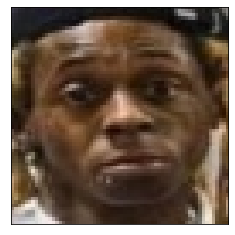

In [93]:
show(100)

  Bald : No


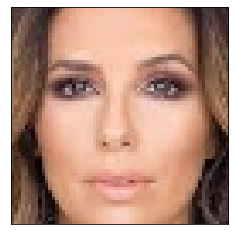

In [95]:
show(600)

In [70]:
images_f=np.array(images)
y = np.array(balds)
X = images_f/255

[0 1]
[5000 4510]


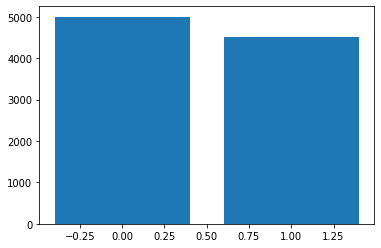

In [71]:
val,counts=np.unique(y,return_counts=1)
print(val)
print(counts)
plt.bar(val,counts)
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

### Building model

In [74]:
B_model = models.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(2, activation='sigmoid')    

])
B_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
B_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 128)       

In [75]:
fle_s="Bald_Detection.h5"
checkpoint=ModelCheckpoint(fle_s,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=40,monitor='val_accuracy',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [76]:
B_History = B_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150,callbacks=callback_list)

Epoch 1/150
223/223 [==============================] - ETA: 0s - loss: 0.3422 - accuracy: 0.8438
Epoch 1: val_accuracy improved from -inf to 0.92557, saving model to Bald_Detection2.h5
223/223 [==============================] - 41s 179ms/step - loss: 0.3422 - accuracy: 0.8438 - val_loss: 0.1987 - val_accuracy: 0.9256
Epoch 2/150
223/223 [==============================] - ETA: 0s - loss: 0.2077 - accuracy: 0.9211
Epoch 2: val_accuracy improved from 0.92557 to 0.93650, saving model to Bald_Detection2.h5
223/223 [==============================] - 40s 180ms/step - loss: 0.2077 - accuracy: 0.9211 - val_loss: 0.1726 - val_accuracy: 0.9365
Epoch 3/150
223/223 [==============================] - ETA: 0s - loss: 0.1542 - accuracy: 0.9421
Epoch 3: val_accuracy improved from 0.93650 to 0.93692, saving model to Bald_Detection2.h5
223/223 [==============================] - 39s 176ms/step - loss: 0.1542 - accuracy: 0.9421 - val_loss: 0.1791 - val_accuracy: 0.9369
Epoch 4/150
223/223 [================

Epoch 57/150
223/223 [==============================] - ETA: 0s - loss: 3.9527e-07 - accuracy: 1.0000
Epoch 57: val_accuracy did not improve from 0.95963
223/223 [==============================] - 23s 105ms/step - loss: 3.9527e-07 - accuracy: 1.0000 - val_loss: 0.5809 - val_accuracy: 0.9596
Epoch 58/150
223/223 [==============================] - ETA: 0s - loss: 3.4177e-07 - accuracy: 1.0000
Epoch 58: val_accuracy did not improve from 0.95963
223/223 [==============================] - 24s 106ms/step - loss: 3.4177e-07 - accuracy: 1.0000 - val_loss: 0.5869 - val_accuracy: 0.9596
Epoch 59/150
223/223 [==============================] - ETA: 0s - loss: 2.9529e-07 - accuracy: 1.0000
Epoch 59: val_accuracy did not improve from 0.95963
223/223 [==============================] - 25s 111ms/step - loss: 2.9529e-07 - accuracy: 1.0000 - val_loss: 0.5924 - val_accuracy: 0.9596
Epoch 60/150
223/223 [==============================] - ETA: 0s - loss: 2.5611e-07 - accuracy: 1.0000
Epoch 60: val_accuracy

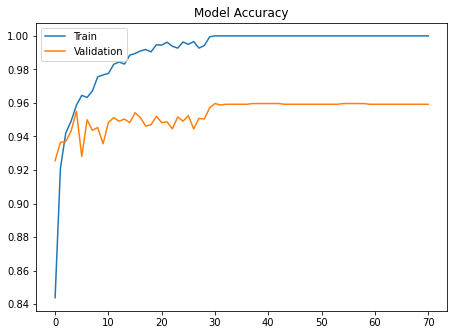

In [97]:
plt.plot(B_History.history['accuracy'])
plt.plot(B_History.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel=("Epoch")
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

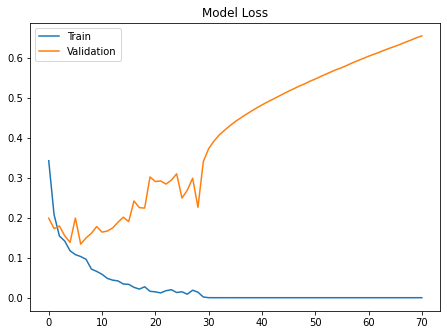

In [78]:
plt.plot(B_History.history['loss'])
plt.plot(B_History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel=("Epoch")
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

In [79]:
y_pred = B_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

75/75 [==============================] - 2s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1250
           1       0.95      0.97      0.96      1128

    accuracy                           0.96      2378
   macro avg       0.96      0.96      0.96      2378
weighted avg       0.96      0.96      0.96      2378



### testing model

In [80]:
B_model.evaluate(X_test,y_test)

75/75 [==============================] - 2s 28ms/step - loss: 0.3724 - accuracy: 0.9596


[0.3723887801170349, 0.9596299529075623]

In [81]:
def test_image(i):
    plt.imshow(X_test[i])
    plt.xticks([]),plt.yticks([])
    bd=['No',"Yes"]
    print("   Bald : ",bd[y_pred_classes[i]])
    plt.show()

   Bald :  No


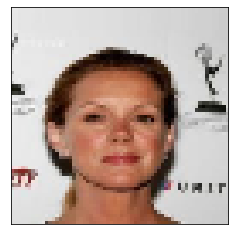

In [82]:
test_image(600)

   Bald :  Yes


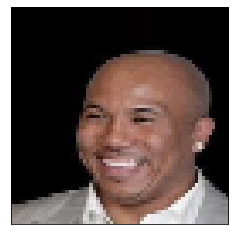

In [101]:
test_image(3)

# 3.Detecting person 'Eye colour'

` 

In [84]:
# Loading data
E_fd="./Data2/Eye"
E_files=os.listdir(E_fd)
eyes=[]
images=[]

for f in E_files:
  
    eye=str(f.split('_')[0])
    total=E_fd+'/'+f
    print(total)
    image =cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(64,64))
    images.append(image)
    eyes.append(eye)

./Data2/Eye/Black_eye (1).jpg
./Data2/Eye/Black_eye (1000).jpg
./Data2/Eye/Black_eye (1001).jpg
./Data2/Eye/Black_eye (1003).jpg
./Data2/Eye/Black_eye (1004).jpg
./Data2/Eye/Black_eye (1005).jpg
./Data2/Eye/Black_eye (1006).jpg
./Data2/Eye/Black_eye (1007).jpg
./Data2/Eye/Black_eye (1008).jpg
./Data2/Eye/Black_eye (1010).jpg
./Data2/Eye/Black_eye (1012).jpg
./Data2/Eye/Black_eye (1013).jpg
./Data2/Eye/Black_eye (1014).jpg
./Data2/Eye/Black_eye (1016).jpg
./Data2/Eye/Black_eye (1017).jpg
./Data2/Eye/Black_eye (1018).jpg
./Data2/Eye/Black_eye (1019).jpg
./Data2/Eye/Black_eye (102).jpg
./Data2/Eye/Black_eye (1020).jpg
./Data2/Eye/Black_eye (1021).jpg
./Data2/Eye/Black_eye (1022).jpg
./Data2/Eye/Black_eye (1023).jpg
./Data2/Eye/Black_eye (1024).jpg
./Data2/Eye/Black_eye (1025).jpg
./Data2/Eye/Black_eye (1026).jpg
./Data2/Eye/Black_eye (1027).jpg
./Data2/Eye/Black_eye (1028).jpg
./Data2/Eye/Black_eye (103).jpg
./Data2/Eye/Black_eye (1030).jpg
./Data2/Eye/Black_eye (1032).jpg
./Data2/Eye/Bla

./Data2/Eye/Black_eye (226).jpg
./Data2/Eye/Black_eye (227).jpg
./Data2/Eye/Black_eye (228).jpg
./Data2/Eye/Black_eye (229).jpg
./Data2/Eye/Black_eye (23).jpg
./Data2/Eye/Black_eye (230).jpg
./Data2/Eye/Black_eye (231).jpg
./Data2/Eye/Black_eye (232).jpg
./Data2/Eye/Black_eye (233).jpg
./Data2/Eye/Black_eye (234).jpg
./Data2/Eye/Black_eye (235).jpg
./Data2/Eye/Black_eye (237).jpg
./Data2/Eye/Black_eye (238).jpg
./Data2/Eye/Black_eye (239).jpg
./Data2/Eye/Black_eye (240).jpg
./Data2/Eye/Black_eye (241).jpg
./Data2/Eye/Black_eye (242).jpg
./Data2/Eye/Black_eye (243).jpg
./Data2/Eye/Black_eye (244).jpg
./Data2/Eye/Black_eye (245).jpg
./Data2/Eye/Black_eye (246).jpg
./Data2/Eye/Black_eye (247).jpg
./Data2/Eye/Black_eye (248).jpg
./Data2/Eye/Black_eye (249).jpg
./Data2/Eye/Black_eye (250).jpg
./Data2/Eye/Black_eye (251).jpg
./Data2/Eye/Black_eye (252).jpg
./Data2/Eye/Black_eye (253).jpg
./Data2/Eye/Black_eye (254).jpg
./Data2/Eye/Black_eye (255).jpg
./Data2/Eye/Black_eye (256).jpg
./Data2/E

./Data2/Eye/Black_eye (530).jpg
./Data2/Eye/Black_eye (531).jpg
./Data2/Eye/Black_eye (532).jpg
./Data2/Eye/Black_eye (533).jpg
./Data2/Eye/Black_eye (534).jpg
./Data2/Eye/Black_eye (535).jpg
./Data2/Eye/Black_eye (536).jpg
./Data2/Eye/Black_eye (537).jpg
./Data2/Eye/Black_eye (539).jpg
./Data2/Eye/Black_eye (540).jpg
./Data2/Eye/Black_eye (541).jpg
./Data2/Eye/Black_eye (542).jpg
./Data2/Eye/Black_eye (543).jpg
./Data2/Eye/Black_eye (547).jpg
./Data2/Eye/Black_eye (548).jpg
./Data2/Eye/Black_eye (549).jpg
./Data2/Eye/Black_eye (55).jpg
./Data2/Eye/Black_eye (552).jpg
./Data2/Eye/Black_eye (553).jpg
./Data2/Eye/Black_eye (554).jpg
./Data2/Eye/Black_eye (555).jpg
./Data2/Eye/Black_eye (556).jpg
./Data2/Eye/Black_eye (557).jpg
./Data2/Eye/Black_eye (558).jpg
./Data2/Eye/Black_eye (559).jpg
./Data2/Eye/Black_eye (56).jpg
./Data2/Eye/Black_eye (560).jpg
./Data2/Eye/Black_eye (562).jpg
./Data2/Eye/Black_eye (563).jpg
./Data2/Eye/Black_eye (564).jpg
./Data2/Eye/Black_eye (565).jpg
./Data2/Ey

./Data2/Eye/Black_eye (850).jpg
./Data2/Eye/Black_eye (852).jpg
./Data2/Eye/Black_eye (853).jpg
./Data2/Eye/Black_eye (855).jpg
./Data2/Eye/Black_eye (856).jpg
./Data2/Eye/Black_eye (858).jpg
./Data2/Eye/Black_eye (859).jpg
./Data2/Eye/Black_eye (86).jpg
./Data2/Eye/Black_eye (860).jpg
./Data2/Eye/Black_eye (861).jpg
./Data2/Eye/Black_eye (862).jpg
./Data2/Eye/Black_eye (863).jpg
./Data2/Eye/Black_eye (864).jpg
./Data2/Eye/Black_eye (865).jpg
./Data2/Eye/Black_eye (866).jpg
./Data2/Eye/Black_eye (867).jpg
./Data2/Eye/Black_eye (868).jpg
./Data2/Eye/Black_eye (869).jpg
./Data2/Eye/Black_eye (87).jpg
./Data2/Eye/Black_eye (870).jpg
./Data2/Eye/Black_eye (871).jpg
./Data2/Eye/Black_eye (872).jpg
./Data2/Eye/Black_eye (873).jpg
./Data2/Eye/Black_eye (874).jpg
./Data2/Eye/Black_eye (875).jpg
./Data2/Eye/Black_eye (876).jpg
./Data2/Eye/Black_eye (877).jpg
./Data2/Eye/Black_eye (878).jpg
./Data2/Eye/Black_eye (879).jpg
./Data2/Eye/Black_eye (88).jpg
./Data2/Eye/Black_eye (880).jpg
./Data2/Eye

./Data2/Eye/Blue_eye (1205).jpg
./Data2/Eye/Blue_eye (1206).jpg
./Data2/Eye/Blue_eye (1207).jpg
./Data2/Eye/Blue_eye (1208).jpg
./Data2/Eye/Blue_eye (1209).jpg
./Data2/Eye/Blue_eye (121).jpg
./Data2/Eye/Blue_eye (1210).jpg
./Data2/Eye/Blue_eye (1211).jpg
./Data2/Eye/Blue_eye (1212).jpg
./Data2/Eye/Blue_eye (1213).jpg
./Data2/Eye/Blue_eye (1214).jpg
./Data2/Eye/Blue_eye (1215).jpg
./Data2/Eye/Blue_eye (1216).jpg
./Data2/Eye/Blue_eye (1217).jpg
./Data2/Eye/Blue_eye (1218).jpg
./Data2/Eye/Blue_eye (1219).jpg
./Data2/Eye/Blue_eye (122).jpg
./Data2/Eye/Blue_eye (1220).jpg
./Data2/Eye/Blue_eye (1221).jpg
./Data2/Eye/Blue_eye (1222).jpg
./Data2/Eye/Blue_eye (1223).jpg
./Data2/Eye/Blue_eye (1224).jpg
./Data2/Eye/Blue_eye (1225).jpg
./Data2/Eye/Blue_eye (1226).jpg
./Data2/Eye/Blue_eye (1227).jpg
./Data2/Eye/Blue_eye (1228).jpg
./Data2/Eye/Blue_eye (1229).jpg
./Data2/Eye/Blue_eye (123).jpg
./Data2/Eye/Blue_eye (1230).jpg
./Data2/Eye/Blue_eye (1231).jpg
./Data2/Eye/Blue_eye (1232).jpg
./Data2/Eye

./Data2/Eye/Blue_eye (1483).jpg
./Data2/Eye/Blue_eye (1484).jpg
./Data2/Eye/Blue_eye (1485).jpg
./Data2/Eye/Blue_eye (1486).jpg
./Data2/Eye/Blue_eye (1487).jpg
./Data2/Eye/Blue_eye (1488).jpg
./Data2/Eye/Blue_eye (1489).jpg
./Data2/Eye/Blue_eye (149).jpg
./Data2/Eye/Blue_eye (1490).jpg
./Data2/Eye/Blue_eye (1491).jpg
./Data2/Eye/Blue_eye (1492).jpg
./Data2/Eye/Blue_eye (1493).jpg
./Data2/Eye/Blue_eye (1494).jpg
./Data2/Eye/Blue_eye (1495).jpg
./Data2/Eye/Blue_eye (1497).jpg
./Data2/Eye/Blue_eye (1498).jpg
./Data2/Eye/Blue_eye (1499).jpg
./Data2/Eye/Blue_eye (15).jpg
./Data2/Eye/Blue_eye (150).jpg
./Data2/Eye/Blue_eye (1500).jpg
./Data2/Eye/Blue_eye (1501).jpg
./Data2/Eye/Blue_eye (1502).jpg
./Data2/Eye/Blue_eye (1503).jpg
./Data2/Eye/Blue_eye (1504).jpg
./Data2/Eye/Blue_eye (1505).jpg
./Data2/Eye/Blue_eye (1506).jpg
./Data2/Eye/Blue_eye (1507).jpg
./Data2/Eye/Blue_eye (1508).jpg
./Data2/Eye/Blue_eye (1509).jpg
./Data2/Eye/Blue_eye (151).jpg
./Data2/Eye/Blue_eye (1510).jpg
./Data2/Eye/B

./Data2/Eye/Blue_eye (1813).jpg
./Data2/Eye/Blue_eye (1815).jpg
./Data2/Eye/Blue_eye (1817).jpg
./Data2/Eye/Blue_eye (1819).jpg
./Data2/Eye/Blue_eye (182).jpg
./Data2/Eye/Blue_eye (1821).jpg
./Data2/Eye/Blue_eye (1823).jpg
./Data2/Eye/Blue_eye (1825).jpg
./Data2/Eye/Blue_eye (1826).jpg
./Data2/Eye/Blue_eye (1828).jpg
./Data2/Eye/Blue_eye (1829).jpg
./Data2/Eye/Blue_eye (183).jpg
./Data2/Eye/Blue_eye (1830).jpg
./Data2/Eye/Blue_eye (1832).jpg
./Data2/Eye/Blue_eye (1833).jpg
./Data2/Eye/Blue_eye (1834).jpg
./Data2/Eye/Blue_eye (1837).jpg
./Data2/Eye/Blue_eye (1838).jpg
./Data2/Eye/Blue_eye (1839).jpg
./Data2/Eye/Blue_eye (1840).jpg
./Data2/Eye/Blue_eye (1841).jpg
./Data2/Eye/Blue_eye (1842).jpg
./Data2/Eye/Blue_eye (1843).jpg
./Data2/Eye/Blue_eye (1844).jpg
./Data2/Eye/Blue_eye (1845).jpg
./Data2/Eye/Blue_eye (1846).jpg
./Data2/Eye/Blue_eye (1847).jpg
./Data2/Eye/Blue_eye (1848).jpg
./Data2/Eye/Blue_eye (1849).jpg
./Data2/Eye/Blue_eye (185).jpg
./Data2/Eye/Blue_eye (1850).jpg
./Data2/Eye

./Data2/Eye/Blue_eye (210).jpg
./Data2/Eye/Blue_eye (2100).jpg
./Data2/Eye/Blue_eye (2101).jpg
./Data2/Eye/Blue_eye (2102).jpg
./Data2/Eye/Blue_eye (2103).jpg
./Data2/Eye/Blue_eye (2104).jpg
./Data2/Eye/Blue_eye (2105).jpg
./Data2/Eye/Blue_eye (2106).jpg
./Data2/Eye/Blue_eye (2107).jpg
./Data2/Eye/Blue_eye (2108).jpg
./Data2/Eye/Blue_eye (2109).jpg
./Data2/Eye/Blue_eye (211).jpg
./Data2/Eye/Blue_eye (2110).jpg
./Data2/Eye/Blue_eye (2111).jpg
./Data2/Eye/Blue_eye (2112).jpg
./Data2/Eye/Blue_eye (2113).jpg
./Data2/Eye/Blue_eye (2114).jpg
./Data2/Eye/Blue_eye (2115).jpg
./Data2/Eye/Blue_eye (2116).jpg
./Data2/Eye/Blue_eye (2118).jpg
./Data2/Eye/Blue_eye (2119).jpg
./Data2/Eye/Blue_eye (212).jpg
./Data2/Eye/Blue_eye (2120).jpg
./Data2/Eye/Blue_eye (2121).jpg
./Data2/Eye/Blue_eye (2122).jpg
./Data2/Eye/Blue_eye (2123).jpg
./Data2/Eye/Blue_eye (2124).jpg
./Data2/Eye/Blue_eye (2125).jpg
./Data2/Eye/Blue_eye (2126).jpg
./Data2/Eye/Blue_eye (2127).jpg
./Data2/Eye/Blue_eye (2128).jpg
./Data2/Eye

./Data2/Eye/Blue_eye (280).jpg
./Data2/Eye/Blue_eye (281).jpg
./Data2/Eye/Blue_eye (282).jpg
./Data2/Eye/Blue_eye (283).jpg
./Data2/Eye/Blue_eye (284).jpg
./Data2/Eye/Blue_eye (285).jpg
./Data2/Eye/Blue_eye (286).jpg
./Data2/Eye/Blue_eye (287).jpg
./Data2/Eye/Blue_eye (288).jpg
./Data2/Eye/Blue_eye (289).jpg
./Data2/Eye/Blue_eye (29).jpg
./Data2/Eye/Blue_eye (290).jpg
./Data2/Eye/Blue_eye (291).jpg
./Data2/Eye/Blue_eye (292).jpg
./Data2/Eye/Blue_eye (293).jpg
./Data2/Eye/Blue_eye (294).jpg
./Data2/Eye/Blue_eye (295).jpg
./Data2/Eye/Blue_eye (296).jpg
./Data2/Eye/Blue_eye (297).jpg
./Data2/Eye/Blue_eye (299).jpg
./Data2/Eye/Blue_eye (3).jpg
./Data2/Eye/Blue_eye (30).jpg
./Data2/Eye/Blue_eye (300).jpg
./Data2/Eye/Blue_eye (301).jpg
./Data2/Eye/Blue_eye (302).jpg
./Data2/Eye/Blue_eye (303).jpg
./Data2/Eye/Blue_eye (304).jpg
./Data2/Eye/Blue_eye (305).jpg
./Data2/Eye/Blue_eye (306).jpg
./Data2/Eye/Blue_eye (307).jpg
./Data2/Eye/Blue_eye (308).jpg
./Data2/Eye/Blue_eye (309).jpg
./Data2/Eye/

./Data2/Eye/Blue_eye (590).jpg
./Data2/Eye/Blue_eye (591).jpg
./Data2/Eye/Blue_eye (592).jpg
./Data2/Eye/Blue_eye (593).jpg
./Data2/Eye/Blue_eye (594).jpg
./Data2/Eye/Blue_eye (595).jpg
./Data2/Eye/Blue_eye (596).jpg
./Data2/Eye/Blue_eye (597).jpg
./Data2/Eye/Blue_eye (598).jpg
./Data2/Eye/Blue_eye (599).jpg
./Data2/Eye/Blue_eye (6).jpg
./Data2/Eye/Blue_eye (60).jpg
./Data2/Eye/Blue_eye (600).jpg
./Data2/Eye/Blue_eye (601).jpg
./Data2/Eye/Blue_eye (602).jpg
./Data2/Eye/Blue_eye (603).jpg
./Data2/Eye/Blue_eye (604).jpg
./Data2/Eye/Blue_eye (605).jpg
./Data2/Eye/Blue_eye (606).jpg
./Data2/Eye/Blue_eye (607).jpg
./Data2/Eye/Blue_eye (608).jpg
./Data2/Eye/Blue_eye (609).jpg
./Data2/Eye/Blue_eye (61).jpg
./Data2/Eye/Blue_eye (610).jpg
./Data2/Eye/Blue_eye (611).jpg
./Data2/Eye/Blue_eye (612).jpg
./Data2/Eye/Blue_eye (613).jpg
./Data2/Eye/Blue_eye (614).jpg
./Data2/Eye/Blue_eye (615).jpg
./Data2/Eye/Blue_eye (616).jpg
./Data2/Eye/Blue_eye (617).jpg
./Data2/Eye/Blue_eye (618).jpg
./Data2/Eye/

./Data2/Eye/Blue_eye (902).jpg
./Data2/Eye/Blue_eye (903).jpg
./Data2/Eye/Blue_eye (904).jpg
./Data2/Eye/Blue_eye (905).jpg
./Data2/Eye/Blue_eye (906).jpg
./Data2/Eye/Blue_eye (907).jpg
./Data2/Eye/Blue_eye (908).jpg
./Data2/Eye/Blue_eye (909).jpg
./Data2/Eye/Blue_eye (91).jpg
./Data2/Eye/Blue_eye (910).jpg
./Data2/Eye/Blue_eye (911).jpg
./Data2/Eye/Blue_eye (912).jpg
./Data2/Eye/Blue_eye (913).jpg
./Data2/Eye/Blue_eye (914).jpg
./Data2/Eye/Blue_eye (915).jpg
./Data2/Eye/Blue_eye (916).jpg
./Data2/Eye/Blue_eye (917).jpg
./Data2/Eye/Blue_eye (919).jpg
./Data2/Eye/Blue_eye (92).jpg
./Data2/Eye/Blue_eye (920).jpg
./Data2/Eye/Blue_eye (921).jpg
./Data2/Eye/Blue_eye (922).jpg
./Data2/Eye/Blue_eye (924).jpg
./Data2/Eye/Blue_eye (925).jpg
./Data2/Eye/Blue_eye (927).jpg
./Data2/Eye/Blue_eye (928).jpg
./Data2/Eye/Blue_eye (929).jpg
./Data2/Eye/Blue_eye (93).jpg
./Data2/Eye/Blue_eye (930).jpg
./Data2/Eye/Blue_eye (931).jpg
./Data2/Eye/Blue_eye (932).jpg
./Data2/Eye/Blue_eye (933).jpg
./Data2/Eye

./Data2/Eye/Brown_eye (1176).jpg
./Data2/Eye/Brown_eye (1177).jpg
./Data2/Eye/Brown_eye (1178).jpg
./Data2/Eye/Brown_eye (1179).jpg
./Data2/Eye/Brown_eye (118).jpg
./Data2/Eye/Brown_eye (1180).jpg
./Data2/Eye/Brown_eye (1181).jpg
./Data2/Eye/Brown_eye (1182).jpg
./Data2/Eye/Brown_eye (1183).jpg
./Data2/Eye/Brown_eye (1184).jpg
./Data2/Eye/Brown_eye (119).jpg
./Data2/Eye/Brown_eye (12).jpg
./Data2/Eye/Brown_eye (120).jpg
./Data2/Eye/Brown_eye (121).jpg
./Data2/Eye/Brown_eye (122).jpg
./Data2/Eye/Brown_eye (123).jpg
./Data2/Eye/Brown_eye (124).jpg
./Data2/Eye/Brown_eye (125).jpg
./Data2/Eye/Brown_eye (126).jpg
./Data2/Eye/Brown_eye (127).jpg
./Data2/Eye/Brown_eye (128).jpg
./Data2/Eye/Brown_eye (13).jpg
./Data2/Eye/Brown_eye (130).jpg
./Data2/Eye/Brown_eye (131).jpg
./Data2/Eye/Brown_eye (132).jpg
./Data2/Eye/Brown_eye (133).jpg
./Data2/Eye/Brown_eye (134).jpg
./Data2/Eye/Brown_eye (135).jpg
./Data2/Eye/Brown_eye (136).jpg
./Data2/Eye/Brown_eye (137).jpg
./Data2/Eye/Brown_eye (138).jpg
.

./Data2/Eye/Brown_eye (397).jpg
./Data2/Eye/Brown_eye (398).jpg
./Data2/Eye/Brown_eye (399).jpg
./Data2/Eye/Brown_eye (4).jpg
./Data2/Eye/Brown_eye (40).jpg
./Data2/Eye/Brown_eye (401).jpg
./Data2/Eye/Brown_eye (402).jpg
./Data2/Eye/Brown_eye (403).jpg
./Data2/Eye/Brown_eye (405).jpg
./Data2/Eye/Brown_eye (406).jpg
./Data2/Eye/Brown_eye (407).jpg
./Data2/Eye/Brown_eye (408).jpg
./Data2/Eye/Brown_eye (409).jpg
./Data2/Eye/Brown_eye (41).jpg
./Data2/Eye/Brown_eye (410).jpg
./Data2/Eye/Brown_eye (411).jpg
./Data2/Eye/Brown_eye (412).jpg
./Data2/Eye/Brown_eye (413).jpg
./Data2/Eye/Brown_eye (414).jpg
./Data2/Eye/Brown_eye (415).jpg
./Data2/Eye/Brown_eye (416).jpg
./Data2/Eye/Brown_eye (417).jpg
./Data2/Eye/Brown_eye (418).jpg
./Data2/Eye/Brown_eye (419).jpg
./Data2/Eye/Brown_eye (420).jpg
./Data2/Eye/Brown_eye (421).jpg
./Data2/Eye/Brown_eye (422).jpg
./Data2/Eye/Brown_eye (423).jpg
./Data2/Eye/Brown_eye (424).jpg
./Data2/Eye/Brown_eye (425).jpg
./Data2/Eye/Brown_eye (426).jpg
./Data2/Eye/

./Data2/Eye/Brown_eye (636).jpg
./Data2/Eye/Brown_eye (637).jpg
./Data2/Eye/Brown_eye (638).jpg
./Data2/Eye/Brown_eye (639).jpg
./Data2/Eye/Brown_eye (64).jpg
./Data2/Eye/Brown_eye (640).jpg
./Data2/Eye/Brown_eye (641).jpg
./Data2/Eye/Brown_eye (642).jpg
./Data2/Eye/Brown_eye (643).jpg
./Data2/Eye/Brown_eye (644).jpg
./Data2/Eye/Brown_eye (645).jpg
./Data2/Eye/Brown_eye (646).jpg
./Data2/Eye/Brown_eye (647).jpg
./Data2/Eye/Brown_eye (648).jpg
./Data2/Eye/Brown_eye (649).jpg
./Data2/Eye/Brown_eye (65).jpg
./Data2/Eye/Brown_eye (650).jpg
./Data2/Eye/Brown_eye (651).jpg
./Data2/Eye/Brown_eye (652).jpg
./Data2/Eye/Brown_eye (653).jpg
./Data2/Eye/Brown_eye (654).jpg
./Data2/Eye/Brown_eye (655).jpg
./Data2/Eye/Brown_eye (656).jpg
./Data2/Eye/Brown_eye (657).jpg
./Data2/Eye/Brown_eye (658).jpg
./Data2/Eye/Brown_eye (659).jpg
./Data2/Eye/Brown_eye (66).jpg
./Data2/Eye/Brown_eye (660).jpg
./Data2/Eye/Brown_eye (661).jpg
./Data2/Eye/Brown_eye (662).jpg
./Data2/Eye/Brown_eye (663).jpg
./Data2/Eye

./Data2/Eye/Brown_eye (906).jpg
./Data2/Eye/Brown_eye (907).jpg
./Data2/Eye/Brown_eye (908).jpg
./Data2/Eye/Brown_eye (909).jpg
./Data2/Eye/Brown_eye (91).jpg
./Data2/Eye/Brown_eye (910).jpg
./Data2/Eye/Brown_eye (911).jpg
./Data2/Eye/Brown_eye (912).jpg
./Data2/Eye/Brown_eye (913).jpg
./Data2/Eye/Brown_eye (914).jpg
./Data2/Eye/Brown_eye (915).jpg
./Data2/Eye/Brown_eye (916).jpg
./Data2/Eye/Brown_eye (917).jpg
./Data2/Eye/Brown_eye (918).jpg
./Data2/Eye/Brown_eye (919).jpg
./Data2/Eye/Brown_eye (92).jpg
./Data2/Eye/Brown_eye (920).jpg
./Data2/Eye/Brown_eye (921).jpg
./Data2/Eye/Brown_eye (922).jpg
./Data2/Eye/Brown_eye (923).jpg
./Data2/Eye/Brown_eye (924).jpg
./Data2/Eye/Brown_eye (925).jpg
./Data2/Eye/Brown_eye (926).jpg
./Data2/Eye/Brown_eye (927).jpg
./Data2/Eye/Brown_eye (928).jpg
./Data2/Eye/Brown_eye (929).jpg
./Data2/Eye/Brown_eye (93).jpg
./Data2/Eye/Brown_eye (930).jpg
./Data2/Eye/Brown_eye (931).jpg
./Data2/Eye/Brown_eye (932).jpg
./Data2/Eye/Brown_eye (933).jpg
./Data2/Eye

./Data2/Eye/Green_eye (305).jpg
./Data2/Eye/Green_eye (306).jpg
./Data2/Eye/Green_eye (307).jpg
./Data2/Eye/Green_eye (308).jpg
./Data2/Eye/Green_eye (309).jpg
./Data2/Eye/Green_eye (31).jpg
./Data2/Eye/Green_eye (311).jpg
./Data2/Eye/Green_eye (313).jpg
./Data2/Eye/Green_eye (314).jpg
./Data2/Eye/Green_eye (315).jpg
./Data2/Eye/Green_eye (316).jpg
./Data2/Eye/Green_eye (317).jpg
./Data2/Eye/Green_eye (318).jpg
./Data2/Eye/Green_eye (319).jpg
./Data2/Eye/Green_eye (320).jpg
./Data2/Eye/Green_eye (321).jpg
./Data2/Eye/Green_eye (322).jpg
./Data2/Eye/Green_eye (323).jpg
./Data2/Eye/Green_eye (325).jpg
./Data2/Eye/Green_eye (327).jpg
./Data2/Eye/Green_eye (328).jpg
./Data2/Eye/Green_eye (329).jpg
./Data2/Eye/Green_eye (330).jpg
./Data2/Eye/Green_eye (333).jpg
./Data2/Eye/Green_eye (334).jpg
./Data2/Eye/Green_eye (336).jpg
./Data2/Eye/Green_eye (337).jpg
./Data2/Eye/Green_eye (338).jpg
./Data2/Eye/Green_eye (339).jpg
./Data2/Eye/Green_eye (34).jpg
./Data2/Eye/Green_eye (340).jpg
./Data2/Ey

./Data2/Eye/Green_eye (603).jpg
./Data2/Eye/Green_eye (604).jpg
./Data2/Eye/Green_eye (605).jpg
./Data2/Eye/Green_eye (606).jpg
./Data2/Eye/Green_eye (607).jpg
./Data2/Eye/Green_eye (608).jpg
./Data2/Eye/Green_eye (609).jpg
./Data2/Eye/Green_eye (61).jpg
./Data2/Eye/Green_eye (610).jpg
./Data2/Eye/Green_eye (614).jpg
./Data2/Eye/Green_eye (615).jpg
./Data2/Eye/Green_eye (616).jpg
./Data2/Eye/Green_eye (62).jpg
./Data2/Eye/Green_eye (622).jpg
./Data2/Eye/Green_eye (623).jpg
./Data2/Eye/Green_eye (624).jpg
./Data2/Eye/Green_eye (625).jpg
./Data2/Eye/Green_eye (626).jpg
./Data2/Eye/Green_eye (627).jpg
./Data2/Eye/Green_eye (628).jpg
./Data2/Eye/Green_eye (629).jpg
./Data2/Eye/Green_eye (63).jpg
./Data2/Eye/Green_eye (630).jpg
./Data2/Eye/Green_eye (631).jpg
./Data2/Eye/Green_eye (635).jpg
./Data2/Eye/Green_eye (636).jpg
./Data2/Eye/Green_eye (637).jpg
./Data2/Eye/Green_eye (639).jpg
./Data2/Eye/Green_eye (64).jpg
./Data2/Eye/Green_eye (640).jpg
./Data2/Eye/Green_eye (641).jpg
./Data2/Eye/

./Data2/Eye/Green_neweye (444).jpg
./Data2/Eye/Green_neweye (445).jpg
./Data2/Eye/Green_neweye (446).jpg
./Data2/Eye/Green_neweye (447).jpg
./Data2/Eye/Green_neweye (449).jpg
./Data2/Eye/Green_neweye (45).jpg
./Data2/Eye/Green_neweye (451).jpg
./Data2/Eye/Green_neweye (452).jpg
./Data2/Eye/Green_neweye (453).jpg
./Data2/Eye/Green_neweye (454).jpg
./Data2/Eye/Green_neweye (455).jpg
./Data2/Eye/Green_neweye (456).jpg
./Data2/Eye/Green_neweye (457).jpg
./Data2/Eye/Green_neweye (458).jpg
./Data2/Eye/Green_neweye (459).jpg
./Data2/Eye/Green_neweye (460).jpg
./Data2/Eye/Green_neweye (461).jpg
./Data2/Eye/Green_neweye (462).jpg
./Data2/Eye/Green_neweye (463).jpg
./Data2/Eye/Green_neweye (464).jpg
./Data2/Eye/Green_neweye (465).jpg
./Data2/Eye/Green_neweye (466).jpg
./Data2/Eye/Green_neweye (467).jpg
./Data2/Eye/Green_neweye (468).jpg
./Data2/Eye/Green_neweye (469).jpg
./Data2/Eye/Green_neweye (47).jpg
./Data2/Eye/Green_neweye (470).jpg
./Data2/Eye/Green_neweye (471).jpg
./Data2/Eye/Green_newe

./Data2/Eye/Green_neye (190).jpg
./Data2/Eye/Green_neye (191).jpg
./Data2/Eye/Green_neye (192).jpg
./Data2/Eye/Green_neye (193).jpg
./Data2/Eye/Green_neye (194).jpg
./Data2/Eye/Green_neye (195).jpg
./Data2/Eye/Green_neye (196).jpg
./Data2/Eye/Green_neye (197).jpg
./Data2/Eye/Green_neye (198).jpg
./Data2/Eye/Green_neye (199).jpg
./Data2/Eye/Green_neye (2).jpg
./Data2/Eye/Green_neye (20).jpg
./Data2/Eye/Green_neye (200).jpg
./Data2/Eye/Green_neye (201).jpg
./Data2/Eye/Green_neye (202).jpg
./Data2/Eye/Green_neye (203).jpg
./Data2/Eye/Green_neye (204).jpg
./Data2/Eye/Green_neye (205).jpg
./Data2/Eye/Green_neye (206).jpg
./Data2/Eye/Green_neye (207).jpg
./Data2/Eye/Green_neye (208).jpg
./Data2/Eye/Green_neye (209).jpg
./Data2/Eye/Green_neye (21).jpg
./Data2/Eye/Green_neye (210).jpg
./Data2/Eye/Green_neye (211).jpg
./Data2/Eye/Green_neye (212).jpg
./Data2/Eye/Green_neye (213).jpg
./Data2/Eye/Green_neye (214).jpg
./Data2/Eye/Green_neye (215).jpg
./Data2/Eye/Green_neye (216).jpg
./Data2/Eye/Gr

./Data2/Eye/Green_neye (460).jpg
./Data2/Eye/Green_neye (461).jpg
./Data2/Eye/Green_neye (462).jpg
./Data2/Eye/Green_neye (463).jpg
./Data2/Eye/Green_neye (464).jpg
./Data2/Eye/Green_neye (465).jpg
./Data2/Eye/Green_neye (466).jpg
./Data2/Eye/Green_neye (467).jpg
./Data2/Eye/Green_neye (469).jpg
./Data2/Eye/Green_neye (47).jpg
./Data2/Eye/Green_neye (471).jpg
./Data2/Eye/Green_neye (473).jpg
./Data2/Eye/Green_neye (474).jpg
./Data2/Eye/Green_neye (475).jpg
./Data2/Eye/Green_neye (476).jpg
./Data2/Eye/Green_neye (477).jpg
./Data2/Eye/Green_neye (478).jpg
./Data2/Eye/Green_neye (479).jpg
./Data2/Eye/Green_neye (48).jpg
./Data2/Eye/Green_neye (480).jpg
./Data2/Eye/Green_neye (481).jpg
./Data2/Eye/Green_neye (482).jpg
./Data2/Eye/Green_neye (483).jpg
./Data2/Eye/Green_neye (484).jpg
./Data2/Eye/Green_neye (485).jpg
./Data2/Eye/Green_neye (486).jpg
./Data2/Eye/Green_neye (487).jpg
./Data2/Eye/Green_neye (488).jpg
./Data2/Eye/Green_neye (489).jpg
./Data2/Eye/Green_neye (49).jpg
./Data2/Eye/G

./Data2/Eye/Green_neye (71).jpg
./Data2/Eye/Green_neye (713).jpg
./Data2/Eye/Green_neye (714).jpg
./Data2/Eye/Green_neye (715).jpg
./Data2/Eye/Green_neye (716).jpg
./Data2/Eye/Green_neye (717).jpg
./Data2/Eye/Green_neye (718).jpg
./Data2/Eye/Green_neye (719).jpg
./Data2/Eye/Green_neye (72).jpg
./Data2/Eye/Green_neye (720).jpg
./Data2/Eye/Green_neye (721).jpg
./Data2/Eye/Green_neye (722).jpg
./Data2/Eye/Green_neye (723).jpg
./Data2/Eye/Green_neye (724).jpg
./Data2/Eye/Green_neye (725).jpg
./Data2/Eye/Green_neye (726).jpg
./Data2/Eye/Green_neye (727).jpg
./Data2/Eye/Green_neye (728).jpg
./Data2/Eye/Green_neye (729).jpg
./Data2/Eye/Green_neye (73).jpg
./Data2/Eye/Green_neye (730).jpg
./Data2/Eye/Green_neye (731).jpg
./Data2/Eye/Green_neye (732).jpg
./Data2/Eye/Green_neye (733).jpg
./Data2/Eye/Green_neye (734).jpg
./Data2/Eye/Green_neye (74).jpg
./Data2/Eye/Green_neye (75).jpg
./Data2/Eye/Green_neye (76).jpg
./Data2/Eye/Green_neye (77).jpg
./Data2/Eye/Green_neye (78).jpg
./Data2/Eye/Green_

### Data visualization`

In [85]:
def show(i):
    plt.imshow(images[i])
    plt.xticks([]),plt.yticks([])
    print('Eye :',eyes[i])
    plt.show()

Eye : Black


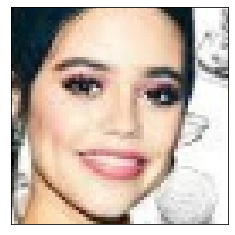

In [86]:
show(704)

Eye : Blue


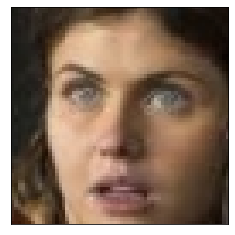

In [87]:
show(1900)

Eye : Brown


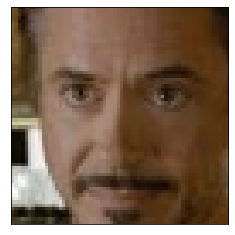

In [88]:
show(3601)

Eye : Green


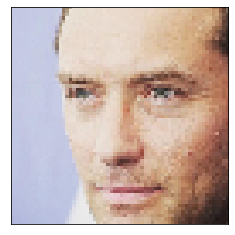

In [89]:
show(4400)

In [90]:
images_f=np.array(images)
y=np.array(eyes)
X = images_f/255

['Black' 'Blue' 'Brown' 'Green']
[ 995 2041 1156 1710]


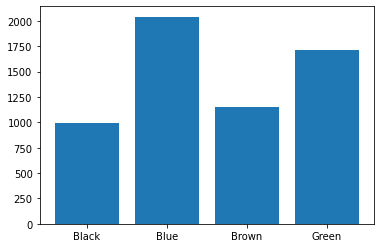

In [91]:
val,counts=np.unique(y,return_counts=1)
print(val)
print(counts)
plt.bar(val,counts)
plt.show()

In [102]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
# reshape 4d to 2d
X_r = X.reshape(X.shape[0], -1)
os_X,os_y = sm.fit_resample(X_r,y)
# Reshape the input data back to the original 4D format
os_X = os_X.reshape(-1,64,64,3)

In [103]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
eyes_ed=LE.fit_transform(os_y)
eyes_ed

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(os_X,eyes_ed,test_size=0.30,random_state=1000,stratify=eyes_ed)

In [106]:
E_model = models.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(4, activation='softmax')    

])
E_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
E_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 128)       

In [107]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
fle_s="Eye_Detection.h5"
checkpoint=ModelCheckpoint(fle_s,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=50,monitor='val_accuracy',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [110]:
E_History = E_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150,callbacks=callback_list)

Epoch 1/150
179/179 [==============================] - ETA: 0s - loss: 0.2839 - accuracy: 0.9200
Epoch 1: val_accuracy improved from 0.79796 to 0.85102, saving model to Eye_Detection2.h5
179/179 [==============================] - 21s 115ms/step - loss: 0.2839 - accuracy: 0.9200 - val_loss: 0.4564 - val_accuracy: 0.8510
Epoch 2/150
179/179 [==============================] - ETA: 0s - loss: 0.1765 - accuracy: 0.9482
Epoch 2: val_accuracy improved from 0.85102 to 0.85143, saving model to Eye_Detection2.h5
179/179 [==============================] - 25s 141ms/step - loss: 0.1765 - accuracy: 0.9482 - val_loss: 0.4534 - val_accuracy: 0.8514
Epoch 3/150
179/179 [==============================] - ETA: 0s - loss: 0.1467 - accuracy: 0.9555
Epoch 3: val_accuracy improved from 0.85143 to 0.89469, saving model to Eye_Detection2.h5
179/179 [==============================] - 24s 135ms/step - loss: 0.1467 - accuracy: 0.9555 - val_loss: 0.3498 - val_accuracy: 0.8947
Epoch 4/150
179/179 [================

179/179 [==============================] - 24s 133ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.2972 - val_accuracy: 0.9355
Epoch 29/150
179/179 [==============================] - ETA: 0s - loss: 0.0838 - accuracy: 0.9779
Epoch 29: val_accuracy did not improve from 0.94122
179/179 [==============================] - 24s 132ms/step - loss: 0.0838 - accuracy: 0.9779 - val_loss: 0.3059 - val_accuracy: 0.9265
Epoch 30/150
179/179 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9844
Epoch 30: val_accuracy did not improve from 0.94122
179/179 [==============================] - 26s 148ms/step - loss: 0.0441 - accuracy: 0.9844 - val_loss: 0.4129 - val_accuracy: 0.9176
Epoch 31/150
179/179 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9839
Epoch 31: val_accuracy did not improve from 0.94122
179/179 [==============================] - 24s 137ms/step - loss: 0.0504 - accuracy: 0.9839 - val_loss: 0.3343 - val_accuracy: 0.9216
Epoch 32/150
1

Epoch 86/150
179/179 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9870
Epoch 86: val_accuracy did not improve from 0.94449
179/179 [==============================] - 38s 214ms/step - loss: 0.0434 - accuracy: 0.9870 - val_loss: 0.4166 - val_accuracy: 0.9298
Epoch 87/150
179/179 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9919
Epoch 87: val_accuracy did not improve from 0.94449
179/179 [==============================] - 43s 241ms/step - loss: 0.0313 - accuracy: 0.9919 - val_loss: 0.3791 - val_accuracy: 0.9306
Epoch 88/150
179/179 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9967
Epoch 88: val_accuracy improved from 0.94449 to 0.94531, saving model to Eye_Detection2.h5
179/179 [==============================] - 41s 231ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.4025 - val_accuracy: 0.9453
Epoch 89/150
179/179 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.9967
Epoch 89: v

Epoch 115/150
179/179 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9968
Epoch 115: val_accuracy did not improve from 0.94531
179/179 [==============================] - 41s 231ms/step - loss: 0.0066 - accuracy: 0.9968 - val_loss: 0.4475 - val_accuracy: 0.9371
Epoch 116/150
179/179 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9970
Epoch 116: val_accuracy did not improve from 0.94531
179/179 [==============================] - 41s 229ms/step - loss: 0.0057 - accuracy: 0.9970 - val_loss: 0.5161 - val_accuracy: 0.9351
Epoch 117/150
179/179 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9940
Epoch 117: val_accuracy did not improve from 0.94531
179/179 [==============================] - 41s 229ms/step - loss: 0.0248 - accuracy: 0.9940 - val_loss: 0.5287 - val_accuracy: 0.9327
Epoch 118/150
179/179 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9851
Epoch 118: val_accuracy did not improve fro

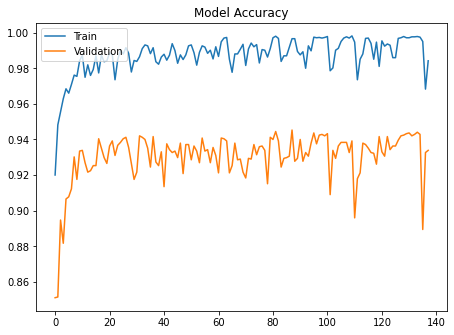

In [117]:
plt.plot(E_History.history['accuracy'])
plt.plot(E_History.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel=("Epoch")
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

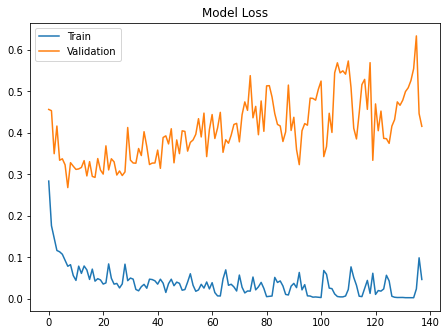

In [112]:
plt.plot(E_History.history['loss'])
plt.plot(E_History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel=("Epoch")
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

In [113]:
y_pred = E_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

77/77 [==============================] - 4s 54ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       613
           1       0.86      0.82      0.84       612
           2       0.90      0.93      0.91       612
           3       0.81      0.82      0.81       613

    accuracy                           0.88      2450
   macro avg       0.88      0.88      0.88      2450
weighted avg       0.88      0.88      0.88      2450



<AxesSubplot:>

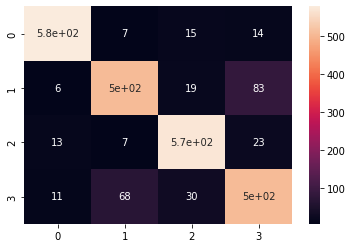

In [114]:
import seaborn as sns
results=confusion_matrix(y_test,y_pred_classes)
sns.heatmap(results,annot=True)

 0 : black, 1: blue, 2:brown, 3:green

### testing model

In [120]:
y_pred = C_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
eye_classes=['Black','Blue', 'Brown','Green']
def test_image(i):
    plt.imshow(X_test[i])
    plt.xticks([]),plt.yticks([])
    print("  Eye : ",eye_classes[y_pred_classes[i]])
    plt.show()

77/77 [==============================] - 4s 57ms/step


  Eye :  Black


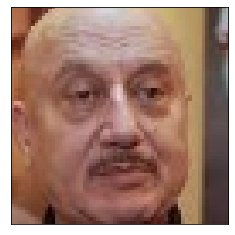

In [136]:
test_image(100)

  Eye :  Blue


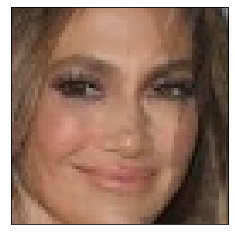

In [140]:
test_image(60)

# Final prediction 
 Combining all the models and predicting all 3

In [222]:

fd="./Data2/Test2"
files=os.listdir(fd)
img=[]
for f in files:
    total=fd+'/'+f
    print(total)
    image =cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(64,64))
    img.append(image)

./Data2/Test2/blue 0 1 2.jpg
./Data2/Test2/brown 1 0  5.jpg
./Data2/Test2/brown 1 1 7.jpg
./Data2/Test2/Brown_eye (1142).jpg
./Data2/Test2/Brown_eye (1153).jpg
./Data2/Test2/Green_eye (4).jpg


In [223]:
img_f=np.array(img)
img_f_2=img_f/255

In [228]:

p_eye = E_model.predict(img_f_2)
p_bald = B_model.predict(img_f_2)
p_child = C_model.predict(img_f_2)
eye_pred= [np.argmax(element) for element in p_eye]
bald_pred= [np.argmax(element) for element in p_bald]
child_pred= [np.argmax(element) for element in p_child]
def test(i):
    eye_classes=['Black','Blue', 'Brown','Green']
    bald_classes=["No", "Yes"]
    child_classes=["No", "Yes"]
    print("\n\n           ",i+1)
    print("Predicted Eye colour is   : " + eye_classes[eye_pred[i]] )
    print("Predicted Bald or not is  : " + bald_classes[bald_pred[i]])
    print("Predicted Child or not is : " + child_classes[child_pred[i]])
    plt.imshow(img_f_2[i])
    plt.xticks([]),plt.yticks([])
    plt.show()

1/1 [==============================] - 0s 49ms/step




            1
Predicted Eye colour is   : Blue
Predicted Bald or not is  : No
Predicted Child or not is : Yes


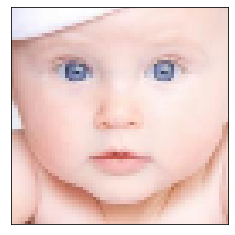



            2
Predicted Eye colour is   : Brown
Predicted Bald or not is  : Yes
Predicted Child or not is : No


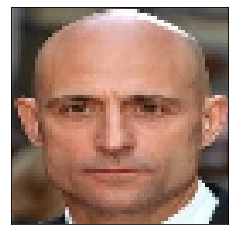



            3
Predicted Eye colour is   : Green
Predicted Bald or not is  : Yes
Predicted Child or not is : Yes


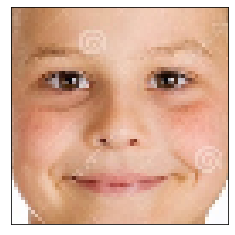



            4
Predicted Eye colour is   : Brown
Predicted Bald or not is  : No
Predicted Child or not is : No


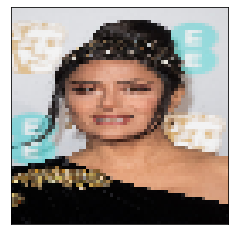



            5
Predicted Eye colour is   : Brown
Predicted Bald or not is  : No
Predicted Child or not is : No


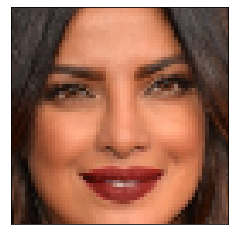



            6
Predicted Eye colour is   : Green
Predicted Bald or not is  : No
Predicted Child or not is : No


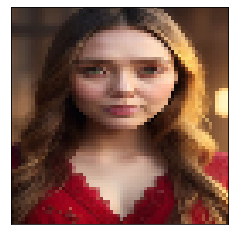

In [229]:
for j in range(len(img)):
    test(j)

# GUI

In [217]:
# Importing Necessary Libraries
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import Image, ImageTk
import numpy as np

# Loading the Model
from keras.models import load_model
eye_model = load_model('Eye_Detection.h5')
bald_model = load_model('Bald_Detection.h5')
child_model = load_model('Child_Detection.h5')

# Initializing the GUI
root = tk.Tk()
root.geometry('800x600')
root.minsize(600,600)
root.maxsize(1920,1080)
root.configure(background="skyblue")
root.title("Pankaj's Eye Colour Detection")


# Initializing the Labels 
f1 = Frame(root, bg="grey", borderwidth=6, relief=SUNKEN)
f1.pack(side=TOP,fill=X)
f2 = Frame(root, bg="silver", borderwidth=6, relief=SUNKEN)
f2.pack(side=LEFT,fill=Y)
f3 = Frame(root, bg="silver", borderwidth=6, relief=SUNKEN)
f3.pack(side=RIGHT,fill=Y)
f4 = Frame(root, bg="silver", borderwidth=6, relief=SUNKEN)
f4.pack(side=BOTTOM,fill=X)
f5 =Frame(root, bg="silver", borderwidth=6, relief=SUNKEN)
f5.pack(side=TOP,pady=20,padx=20)
label0 = Label(f4,text="  " ,background="silver", font=('lucida', 30, "bold")).pack()
label01 = Label(f2,text="   " ,background="gray64", font=('lucida', 15, "bold")).pack()
label02= Label(f3,text="   " ,background="gray64", font=('lucida', 15, "bold")).pack()

label1 = Label(f5, background="#CDCDCD", font=('lucida', 15, "bold"))
label2 = Label(f5, background="#CDCDCD", font=('lucida', 15, 'bold'))
label3 = Label(f5, background="#CDCDCD", font=('lucida', 15, 'bold'))
sign_image = Label(root)
label1.configure(text='Eye   :  ',foreground="red")
label2.configure(text='Bald   :  ',foreground="blue")
label3.configure(text='Child :  ',foreground="green")


# Defining Detect function which detects the eye colour,bald and child of the person in an image using the model
def Detect(file_path):
    global Label_packed
    image = Image.open(file_path)
    image = image.resize((64,64))
    image = np.array(image)
    image = np.array([image]) / 255
    p_eye = eye_model.predict(image)
    p_bald = bald_model.predict(image)
    p_child = child_model.predict(image)
    eye_pred = int(np.argmax(p_eye)) 
    bald_pred = int(np.argmax(p_bald)) 
    child_pred = int(np.argmax(p_child)) 
    eye_classes=['Black','Blue', 'Brown','Green']
    bald_classes=["No", "Yes"]
    child_classes=["No", "Yes"]
    print("Predicted Eye colour is   : " + eye_classes[eye_pred] )
    print("Predicted Bald or not is  : " + bald_classes[bald_pred])
    print("Predicted Child or not is : " + child_classes[child_pred])
    label1.configure(foreground="red", text=f"Eye :  {eye_classes[eye_pred]}")
    label2.configure(foreground="blue", text=f"Bald  :  {bald_classes[bald_pred]}")
    label3.configure(foreground="green", text=f"Child :  {child_classes[child_pred]}")

# Defining Show_detect button function
def show_Detect_button(file_path):
    try:
        Detect_b = Button(f4, text="Detect Image", command=lambda: Detect(file_path), padx=10, pady=5)
        Detect_b.configure(background="#364156", foreground='white', font=('arial', 10, 'bold'))
        Detect_b.place(relx=0.55, rely=0.1)
        
    except:
        pass

# Defining Upload Image Function
def upload_image():
    try:
        file_path = filedialog.askopenfilename(filetypes =[('Image Files', '*.jpg')])
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((root.winfo_width() / 2.25), (root.winfo_height() / 2.25)))
        im = ImageTk.PhotoImage(uploaded)
        label1.configure(text='Eye   :  ',foreground="red")
        label2.configure(text='Bald   :  ',foreground="blue")
        label3.configure(text='Child :  ',foreground="green")

        sign_image.configure(image=im)
        sign_image.image = im
        
        show_Detect_button(file_path)

    except:
        pass

upload = Button(f4, text="Upload an Image", command=upload_image, padx=10, pady=5)
upload.configure(background="#364156", foreground='white', font=('arial', 10, 'bold'))
upload.pack(side='bottom', pady=5)
upload.place(relx=0.3, rely=0.1)
sign_image.pack(side='bottom', expand=True)
label1.pack(side="bottom", expand=True)
label2.pack(side="bottom", expand=True)
label3.pack(side="bottom", expand=True)
heading = Label(f1, text="Eye Bald & Child Detector", pady=10, font=('arial', 20, "bold"),)
heading.configure(background="silver", foreground="black")
heading.pack(fill=X)


root.mainloop()


1/1 [==============================] - 0s 67ms/step
Predicted Eye colour is   : Green
Predicted Bald or not is  : Yes
Predicted Child or not is : No
1/1 [==============================] - 0s 16ms/step
Predicted Eye colour is   : Blue
Predicted Bald or not is  : No
Predicted Child or not is : Yes
1/1 [==============================] - 0s 22ms/step
Predicted Eye colour is   : Green
Predicted Bald or not is  : Yes
Predicted Child or not is : No
1/1 [==============================] - 0s 17ms/step
Predicted Eye colour is   : Green
Predicted Bald or not is  : No
Predicted Child or not is : No
